In [1]:
install.packages("DataExplorer")

library(dplyr)
library(ggplot2)
library(tidyr)
library(readr)
library(forcats)
library(reshape2)
library(DataExplorer)


data <- read_csv2("nsw.csv", show_col_types = FALSE)
categorical_columns <- c(
  "C", "D", "E", "F", "G", "H", "L", "N", "O", "P", "Q", "R",
  "S", "T", "U", "V", "AG", "AH", "AI", "AJ", "AK", "AL", "AM",
  "AN", "AO", "AP", "AQ", "AR"
)
numeric_columns <- c(
  "B", "I", "J", "K", "M", "W", "X", "Y", "Z", "AA", "AB", "AC",
  "AD", "AE", "AF"
)

data[categorical_columns] <- lapply(data[categorical_columns], as.factor)
cat("Dimension:", dim(data))

head(data)

Installing package into 'C:/Users/robert/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'DataExplorer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\robert\AppData\Local\Temp\RtmpSKTk3E\downloaded_packages



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 4.3.3"

Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths


Warning message:
"package 'DataExplorer' was built under R version 4.3.3"
ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.



Dimension: 1512 44

A,B,C,D,E,F,G,H,I,J,⋯,AI,AJ,AK,AL,AM,AN,AO,AP,AQ,AR
<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,45,Male,More than 5 years,Other Services,Professionals - ICT Professionals,Couple with dependent children,Metro,50,50,⋯,5,4,4,5,5,5,4,3,No,11
2,50,Male,More than 5 years,Construction,Professionals - ICT Professionals,Couple with no dependent children,Metro,10,5,⋯,4,4,4,4,4,3,3,3,No,11
3,43,Female,Between 6 and 12 months,Financial and Insurance,"Professionals - Business, Human Resource and Marketing Professionals",Single person,Metro,100,90,⋯,1,5,5,5,4,4,3,2,No,6
4,59,Female,Between 1 and 5 years,Health Care and Social Assistance,Professionals - Health Professionals,One parent family with dependent children,Regional,40,40,⋯,2,2,2,2,2,4,4,4,Yes,11
5,47,Male,More than 5 years,Financial and Insurance,Managers - Specialist Managers,Couple with dependent children,Regional,100,100,⋯,4,4,4,4,4,5,4,3,No,8
6,36,Male,Between 1 and 5 years,Manufacturing,Technicians and trades workers - Construction Trades Workers,Couple with dependent children,Metro,50,50,⋯,3,4,4,3,4,3,3,3,No,8


In [2]:
str(data)

spc_tbl_ [1,512 × 44] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ A : num [1:1512] 1 2 3 4 5 6 7 8 9 10 ...
 $ B : num [1:1512] 45 50 43 59 47 36 48 29 51 40 ...
 $ C : Factor w/ 4 levels "Female","I would rather not say",..: 3 3 1 1 3 3 3 1 1 1 ...
 $ D : Factor w/ 3 levels "Between 1 and 5 years",..: 3 3 2 1 3 1 3 1 3 1 ...
 $ E : Factor w/ 19 levels "Accommodation and Food",..: 13 5 8 9 8 11 15 2 2 13 ...
 $ F : Factor w/ 42 levels "Clerical and administrative workers - Clerical and Office Support Workers",..: 31 31 27 30 25 37 25 2 2 31 ...
 $ G : Factor w/ 7 levels "Couple with dependent children",..: 1 2 7 5 1 1 1 2 5 2 ...
 $ H : Factor w/ 2 levels "Metro","Regional": 1 1 1 2 2 1 1 1 1 1 ...
 $ I : num [1:1512] 50 10 100 40 100 50 100 100 100 100 ...
 $ J : num [1:1512] 50 5 90 40 100 50 80 100 50 90 ...
 $ K : num [1:1512] 80 50 60 40 100 50 100 90 50 100 ...
 $ L : Factor w/ 3 levels "No","Unsure",..: 3 3 3 3 1 1 3 1 2 2 ...
 $ M : num [1:1512] 40 100 20 50 NA NA 20 NA NA NA ..

In [3]:
summary(data[numeric_columns])

       B               I                J                K         
 Min.   :19.00   Min.   :  0.00   Min.   :  0.00   Min.   :  0.00  
 1st Qu.:32.00   1st Qu.: 20.00   1st Qu.: 20.00   1st Qu.: 20.00  
 Median :41.00   Median : 50.00   Median : 50.00   Median : 50.00  
 Mean   :41.77   Mean   : 54.61   Mean   : 49.32   Mean   : 51.74  
 3rd Qu.:51.00   3rd Qu.: 90.00   3rd Qu.: 80.00   3rd Qu.: 80.00  
 Max.   :64.00   Max.   :100.00   Max.   :100.00   Max.   :100.00  
                                                                   
       M                W                X                Y         
 Min.   :  5.00   Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 30.00   1st Qu.: 1.000   1st Qu.: 7.000   1st Qu.: 2.000  
 Median : 50.00   Median : 2.000   Median : 8.000   Median : 3.000  
 Mean   : 52.18   Mean   : 2.246   Mean   : 7.832   Mean   : 2.797  
 3rd Qu.: 80.00   3rd Qu.: 3.000   3rd Qu.: 8.500   3rd Qu.: 4.000  
 Max.   :100.00   Max.   :20.000   Max.   

In [4]:
cat("\nMissing Values:\n")
print(colSums(is.na(data)))


Missing Values:
  A   B   C   D   E   F   G   H   I   J   K   L   M   N   O   P   Q   R   S   T 
  0   0   0   0   0   0   0   0   0   0   0   0 750   0   0   0   0   0   0   0 
  U   V   W   X   Y   Z  AA  AB  AC  AD  AE  AF  AG  AH  AI  AJ  AK  AL  AM  AN 
  0   0   3   3  17   5  12  24   3  18   7   9   0   0   0   0   0   0   0   0 
 AO  AP  AQ  AR 
  0   0   0   0 


In [5]:
cat("\nMissing Values %:\n")
print(colSums(is.na(data)) / nrow(data) * 100)


Missing Values %:
         A          B          C          D          E          F          G 
 0.0000000  0.0000000  0.0000000  0.0000000  0.0000000  0.0000000  0.0000000 
         H          I          J          K          L          M          N 
 0.0000000  0.0000000  0.0000000  0.0000000  0.0000000 49.6031746  0.0000000 
         O          P          Q          R          S          T          U 
 0.0000000  0.0000000  0.0000000  0.0000000  0.0000000  0.0000000  0.0000000 
         V          W          X          Y          Z         AA         AB 
 0.0000000  0.1984127  0.1984127  1.1243386  0.3306878  0.7936508  1.5873016 
        AC         AD         AE         AF         AG         AH         AI 
 0.1984127  1.1904762  0.4629630  0.5952381  0.0000000  0.0000000  0.0000000 
        AJ         AK         AL         AM         AN         AO         AP 
 0.0000000  0.0000000  0.0000000  0.0000000  0.0000000  0.0000000  0.0000000 
        AQ         AR 
 0.0000000  0.0000000 

    Var1 Var2         value
1      B    B  1.0000000000
2      I    B  0.0514171504
3      J    B -0.0269226064
4      K    B  0.0268074020
5      M    B  0.0789450501
6      W    B -0.0982678135
7      X    B  0.1040859082
8      Y    B -0.1160408667
9      Z    B  0.0346133417
10    AA    B  0.0486162485
11    AB    B -0.1843791347
12    AC    B  0.1273945940
13    AD    B -0.0706237977
14    AE    B  0.0822820286
15    AF    B  0.0379851017
16     B    I  0.0514171504
17     I    I  1.0000000000
18     J    I  0.7349949163
19     K    I  0.5555071556
20     M    I -0.1733732593
21     W    I  0.0029275126
22     X    I  0.0136617160
23     Y    I -0.0329025645
24     Z    I -0.0051249493
25    AA    I  0.0177514659
26    AB    I -0.1298917730
27    AC    I  0.0809135558
28    AD    I -0.0791395676
29    AE    I  0.0645669542
30    AF    I  0.0562023425
31     B    J -0.0269226064
32     I    J  0.7349949163
33     J    J  1.0000000000
34     K    J  0.5570716144
35     M    J -0.273

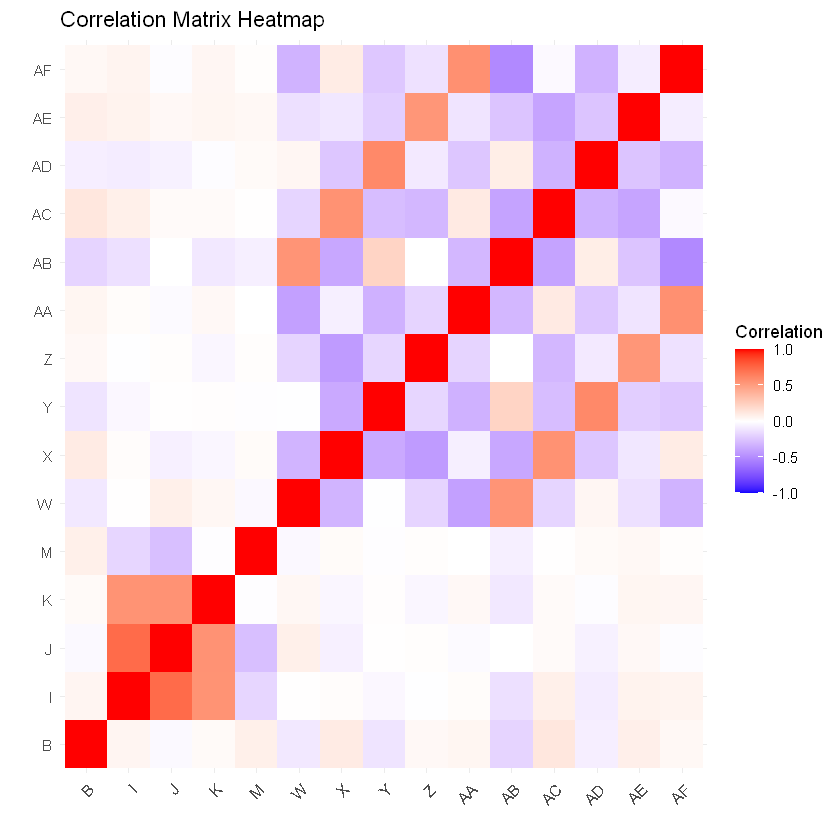

In [6]:
correlation_matrix <- cor(data[numeric_columns], use = "complete.obs")

correlation_melt <- melt(correlation_matrix)

heatmap_plot <- ggplot(
  correlation_melt,
  aes(x = Var1, y = Var2, fill = value)
) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, 
                       limits = c(-1, 1), name = "Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  labs(title = "Correlation Matrix Heatmap", x = "", y = "")

print(heatmap_plot)
print(correlation_melt)

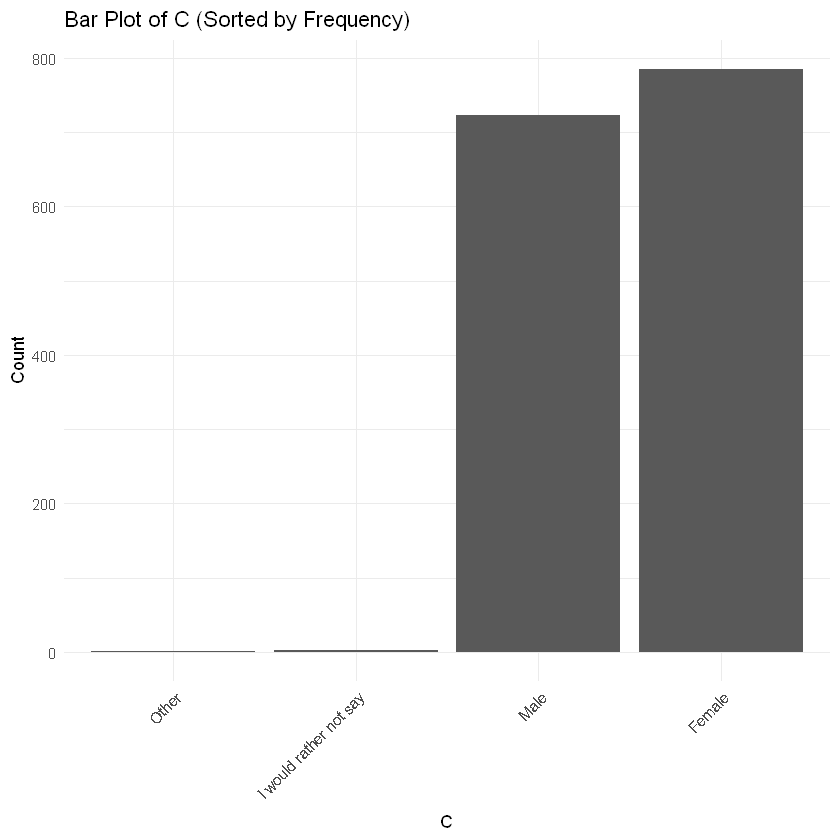

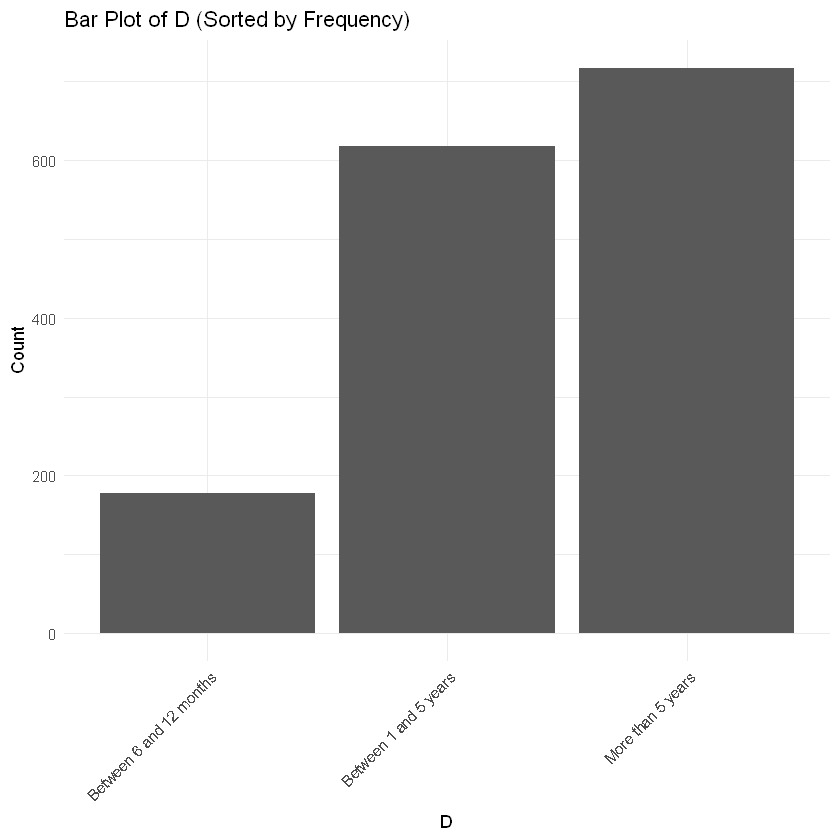

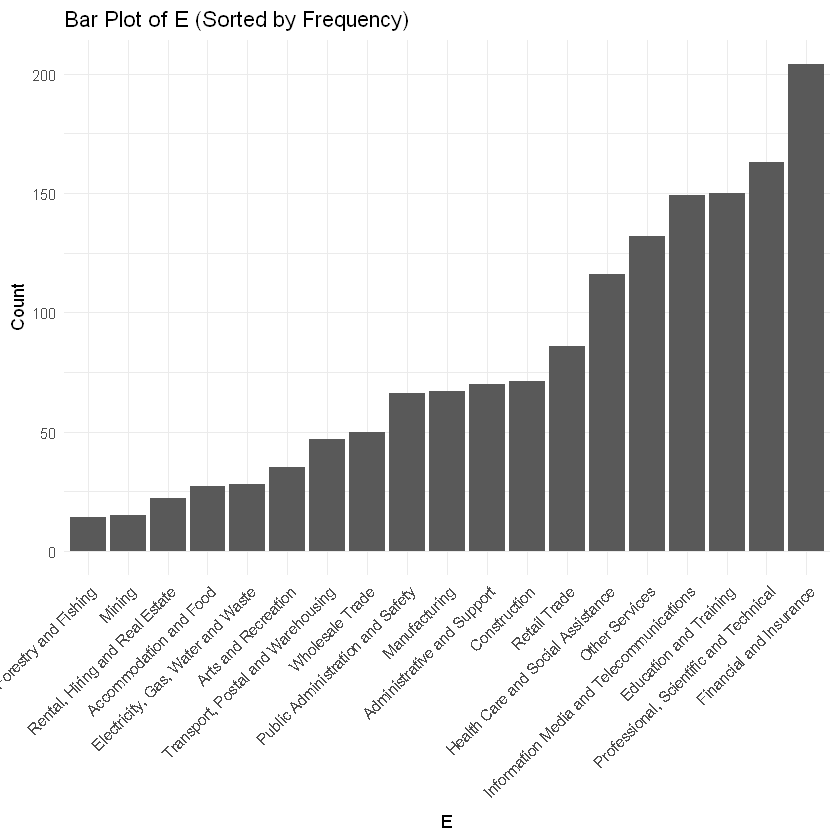

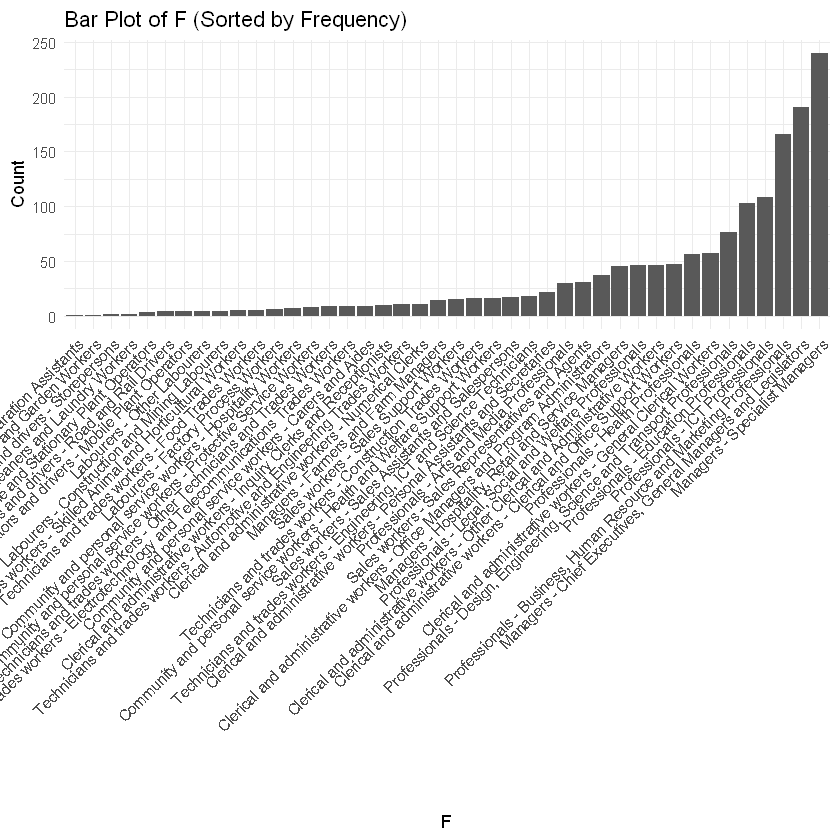

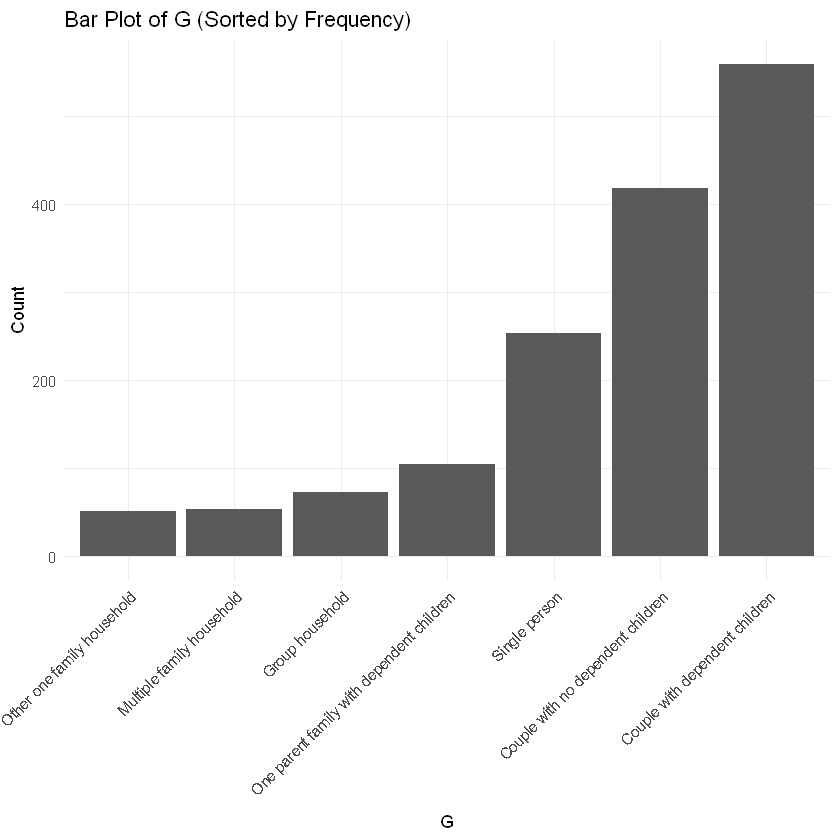

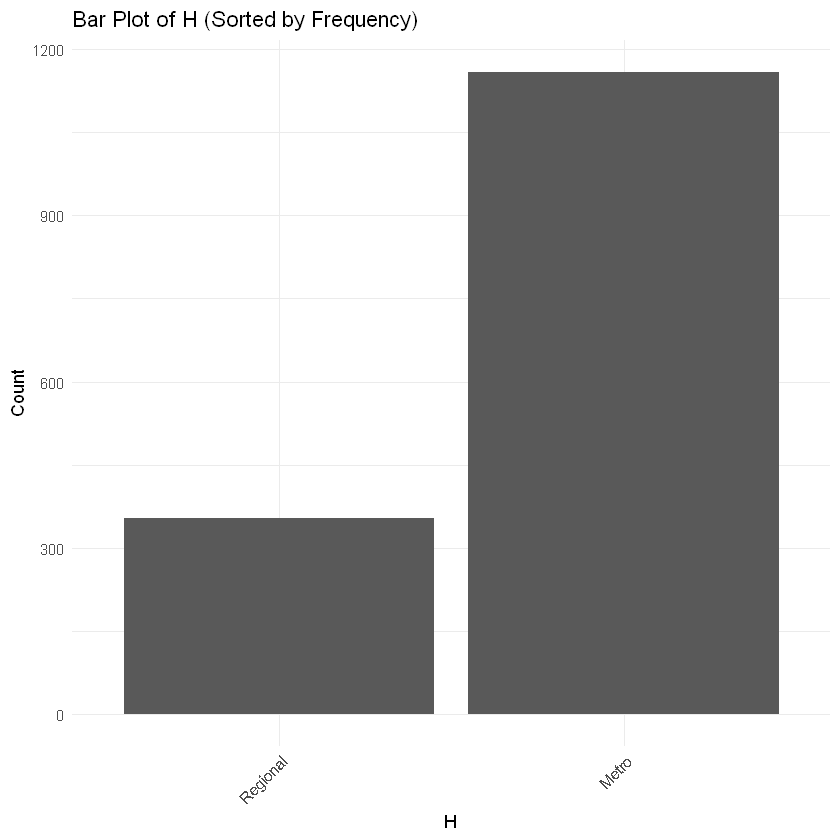

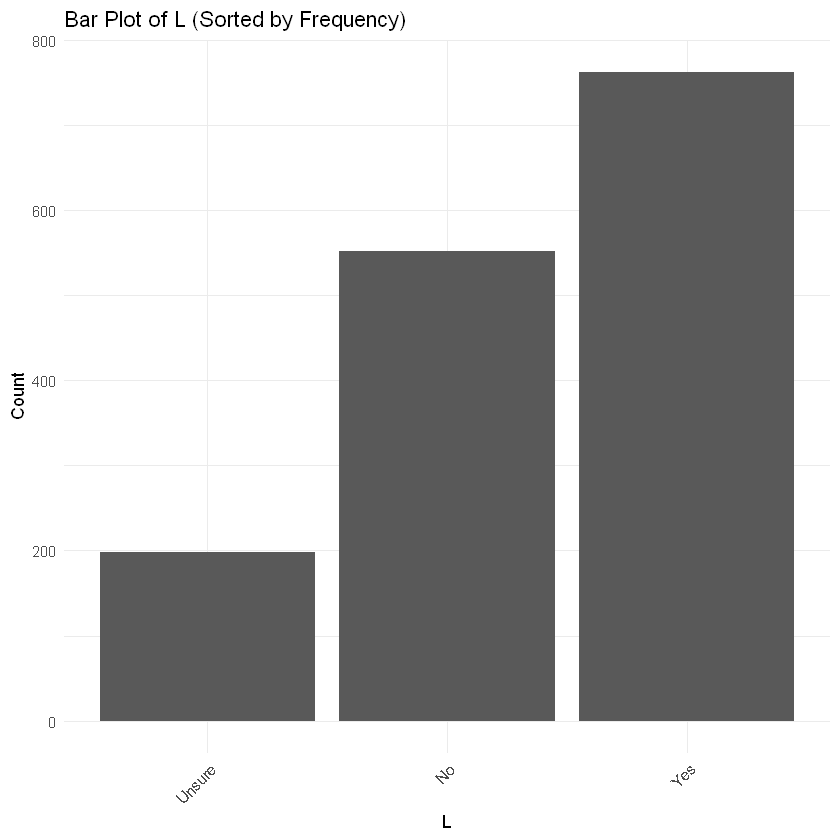

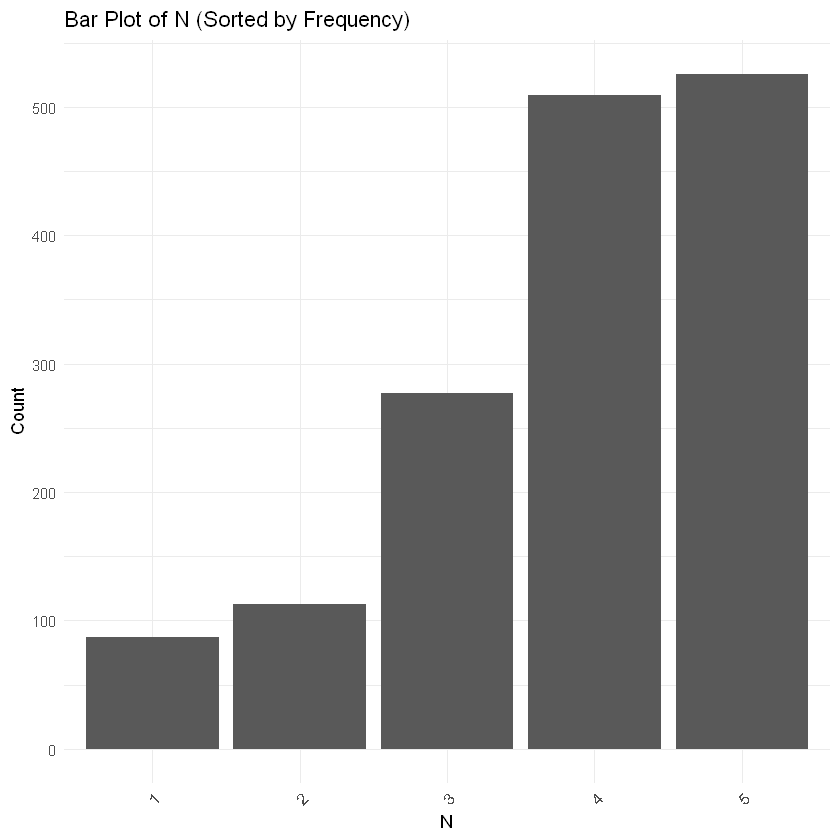

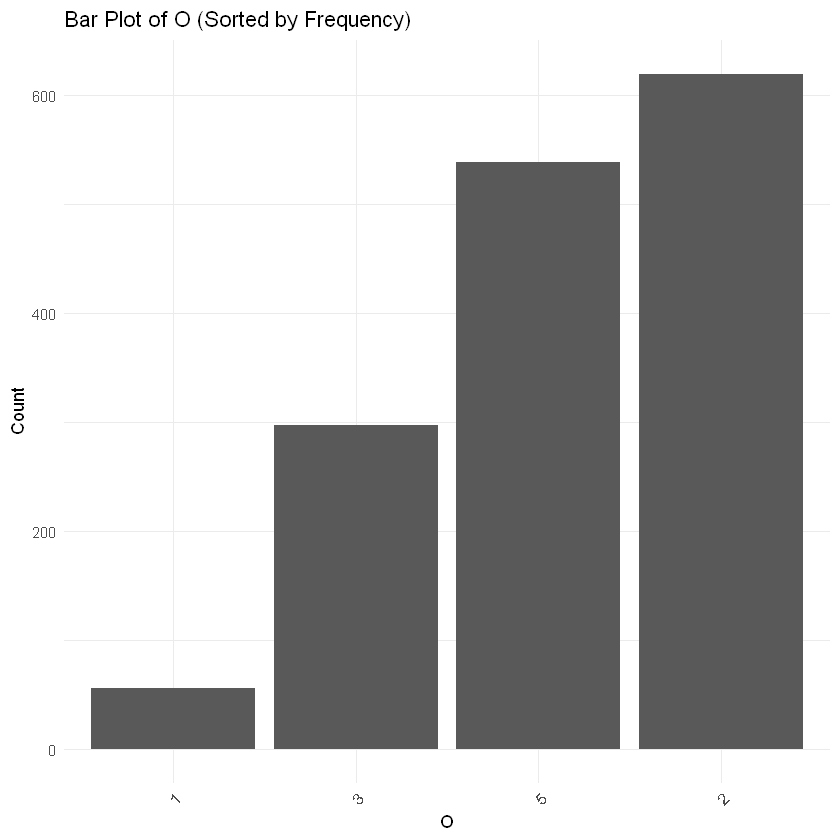

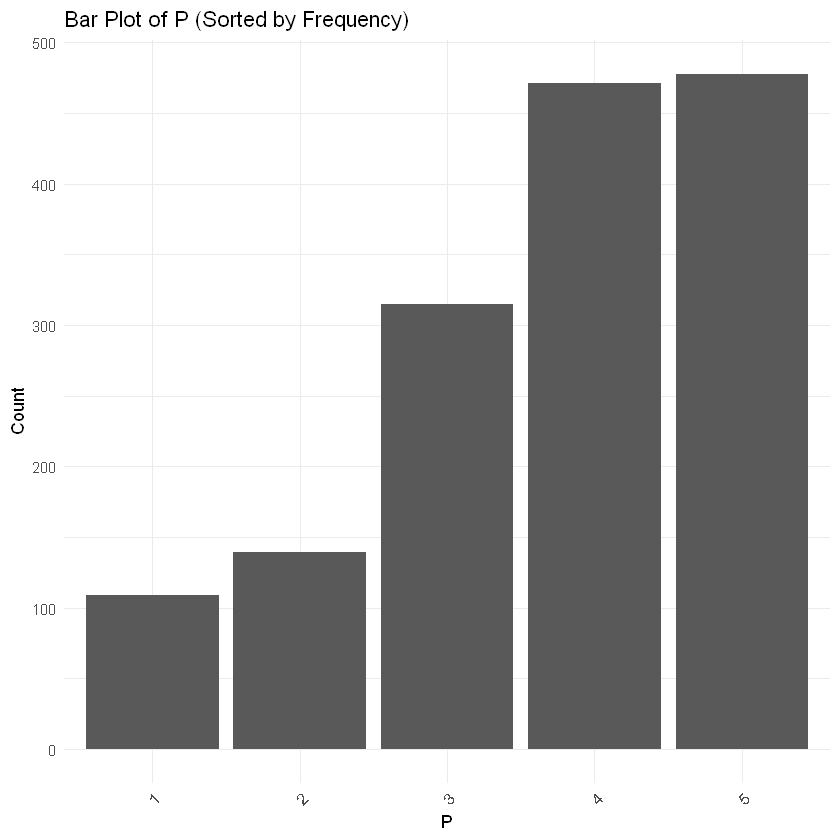

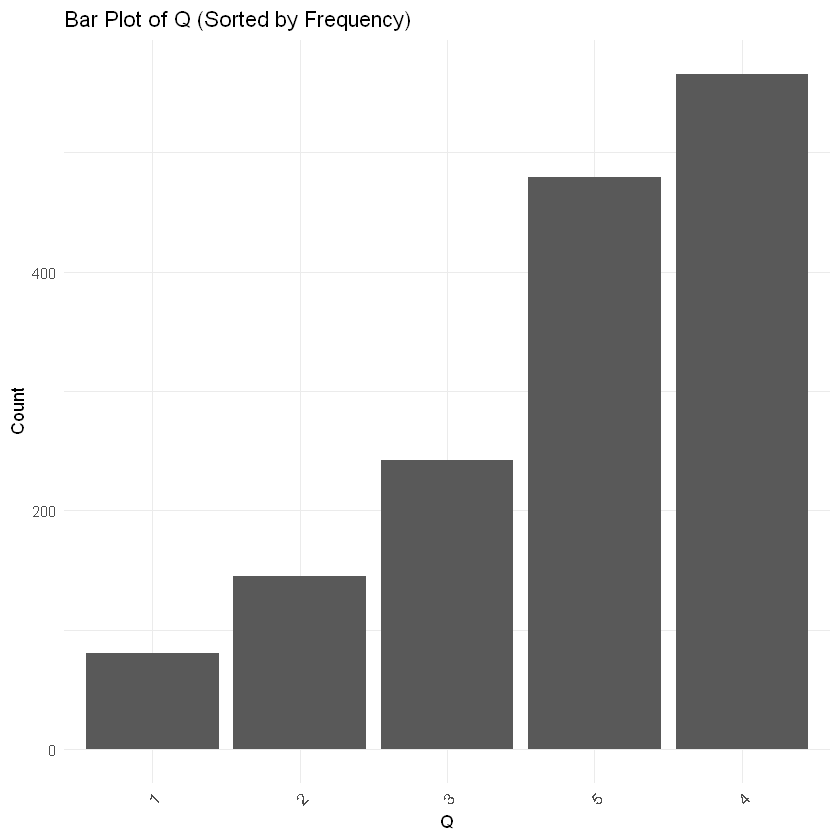

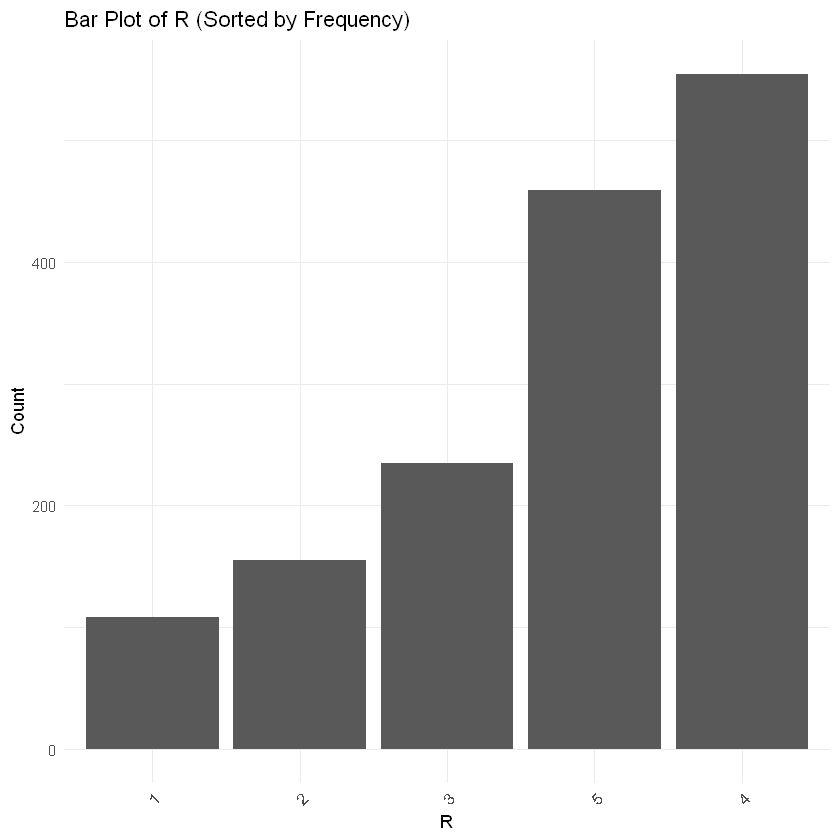

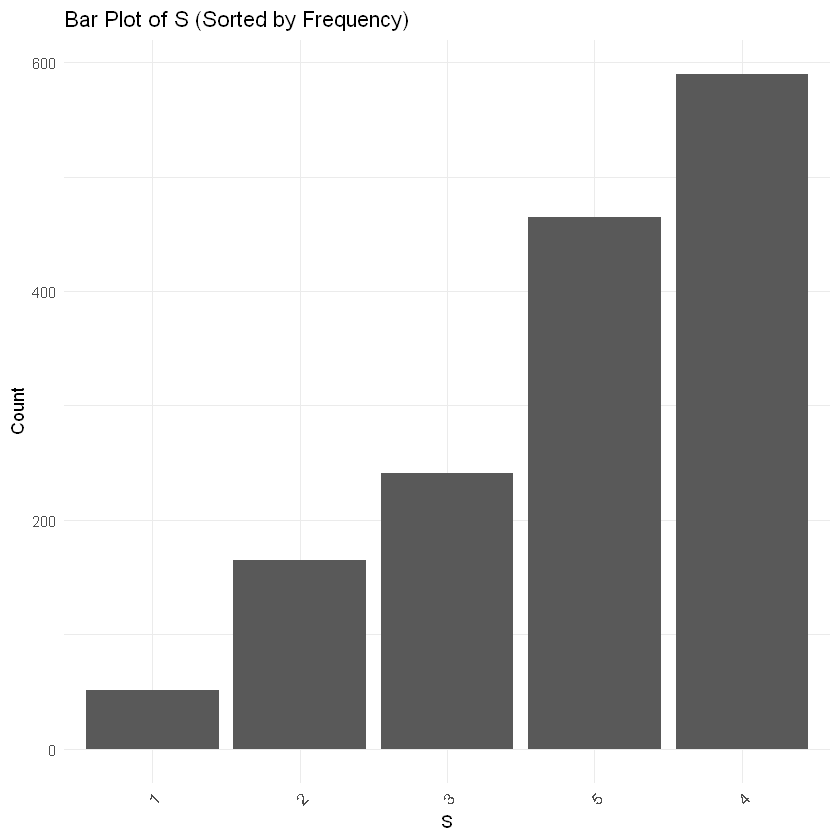

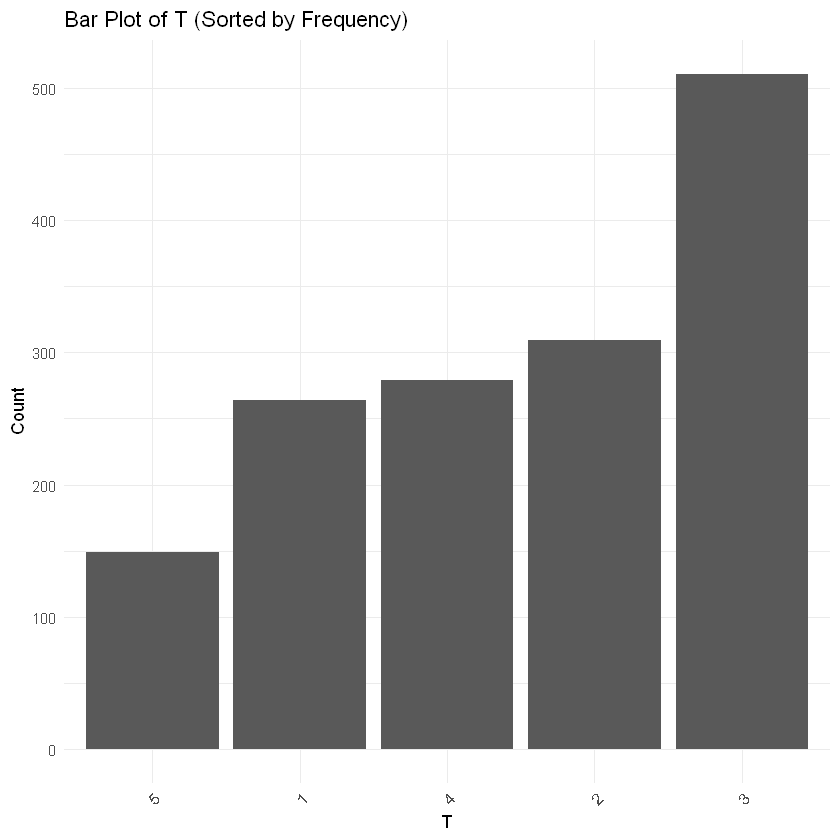

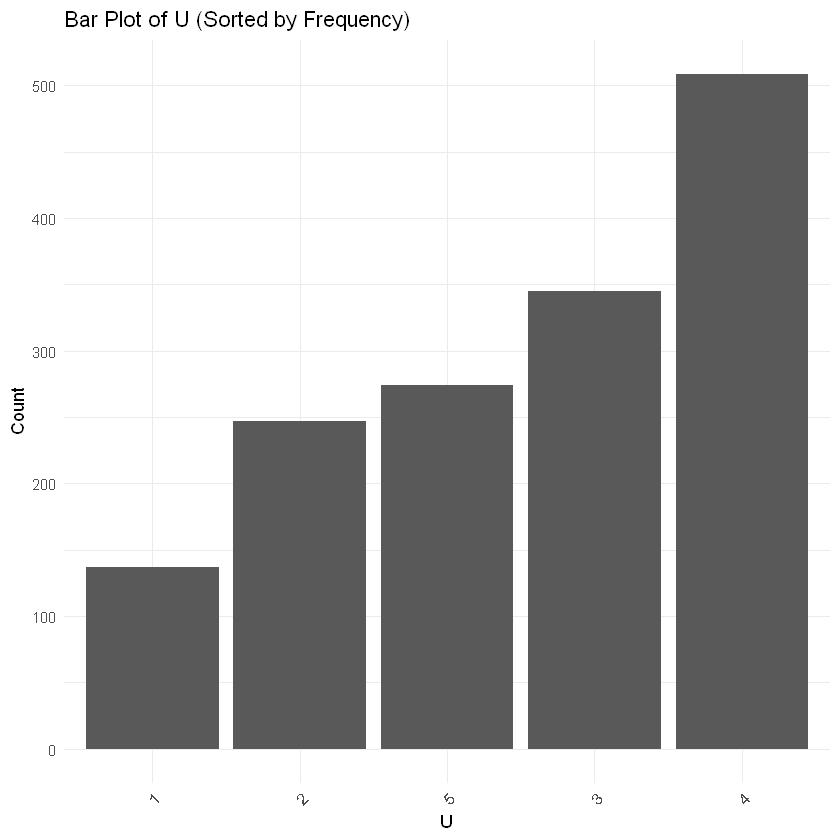

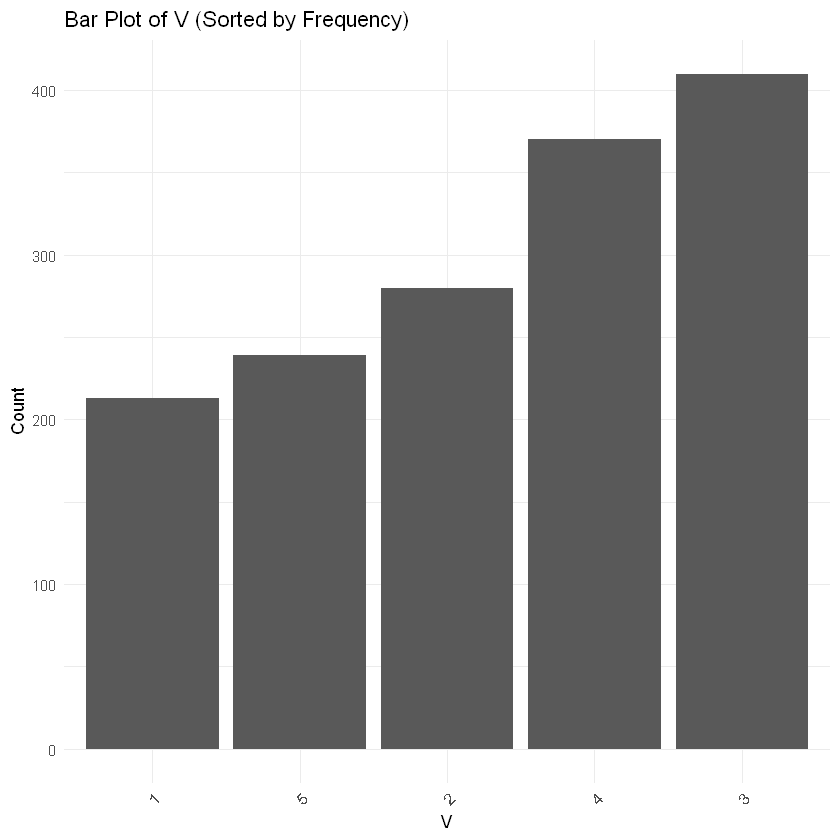

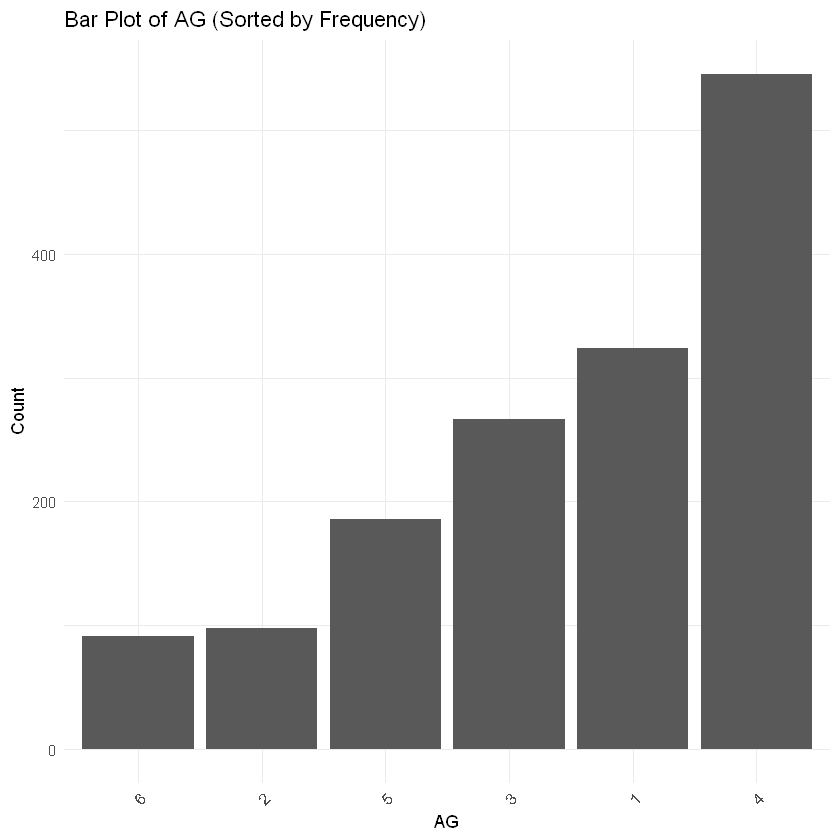

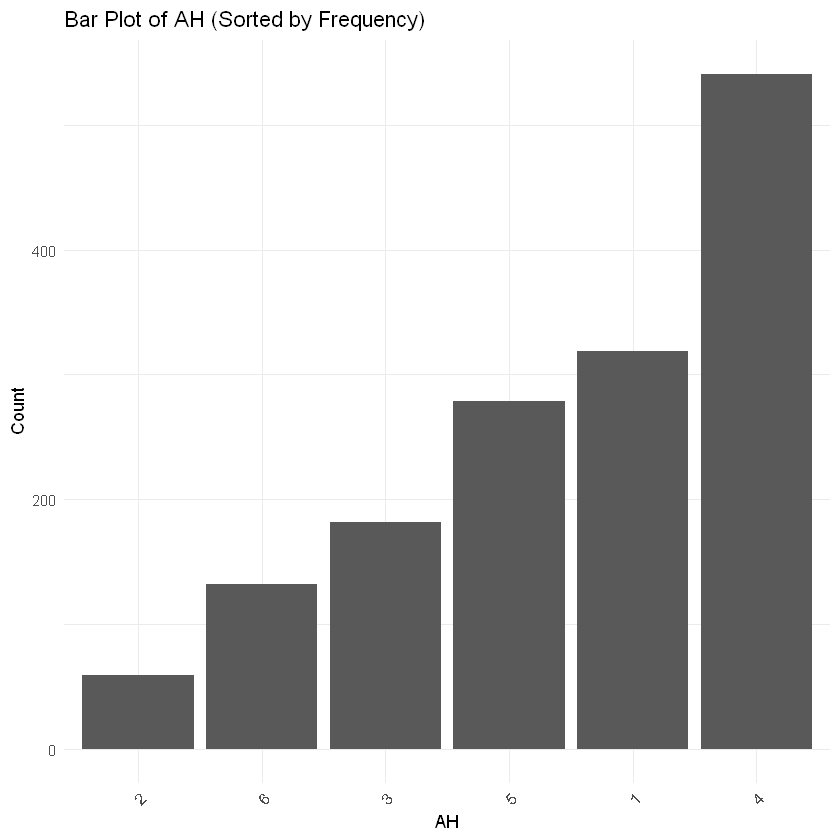

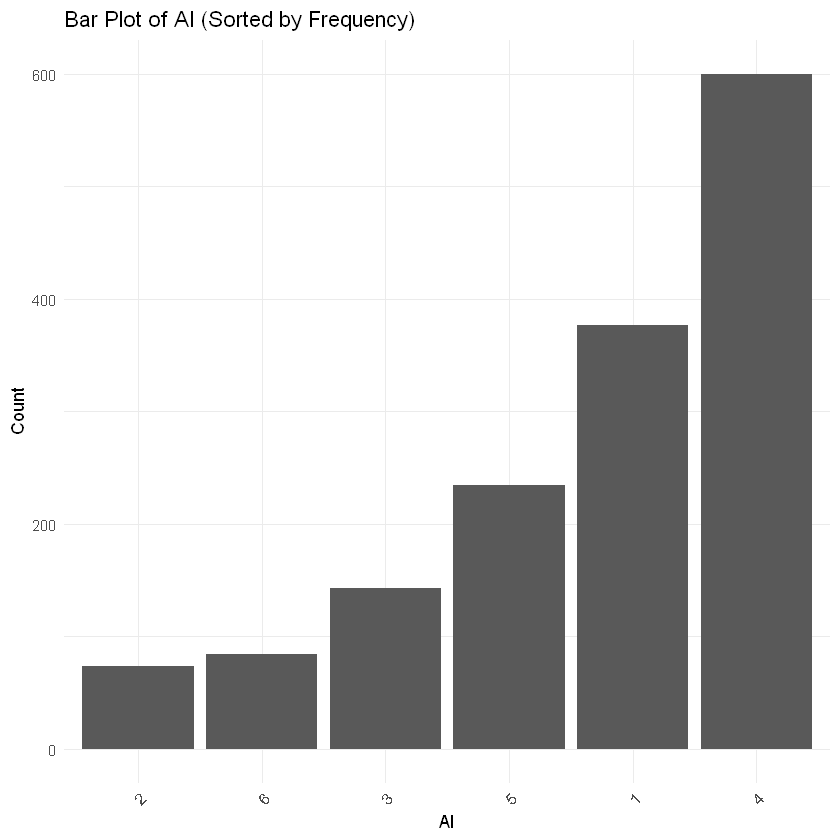

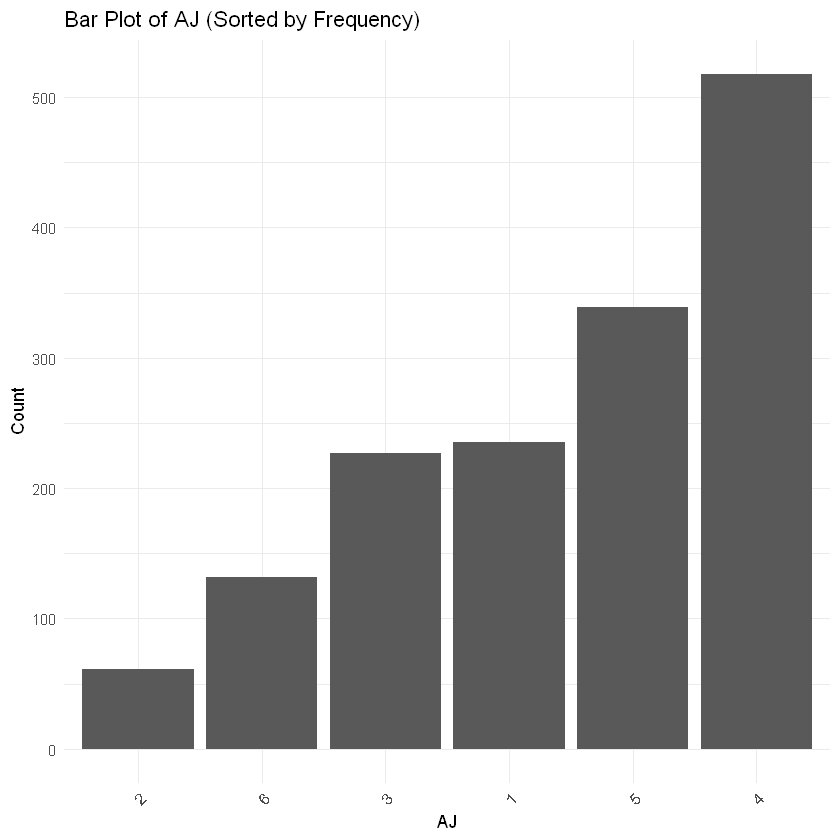

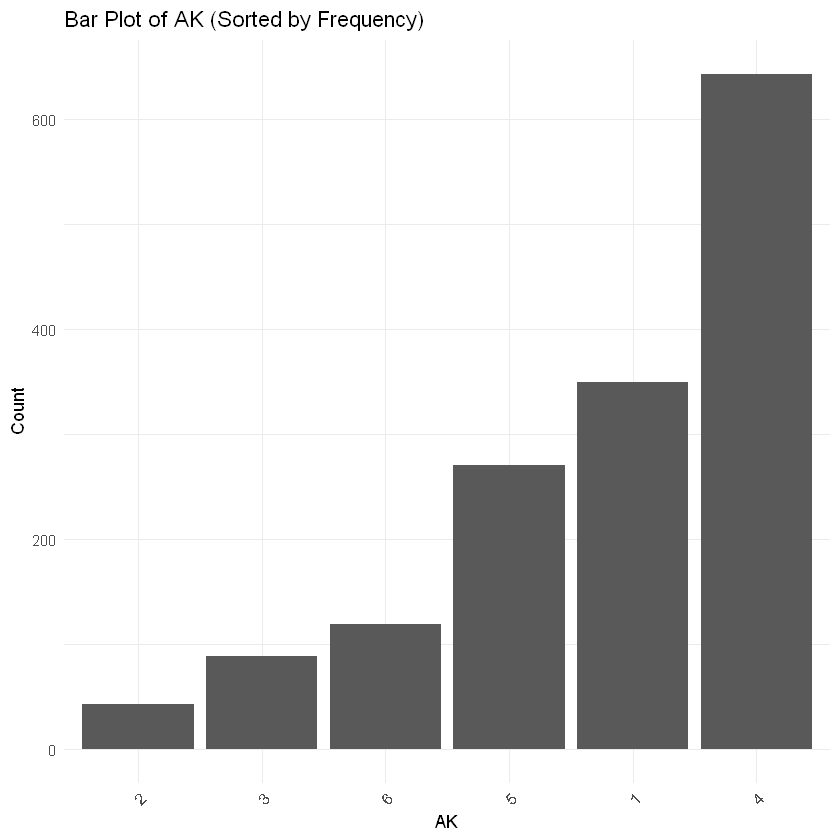

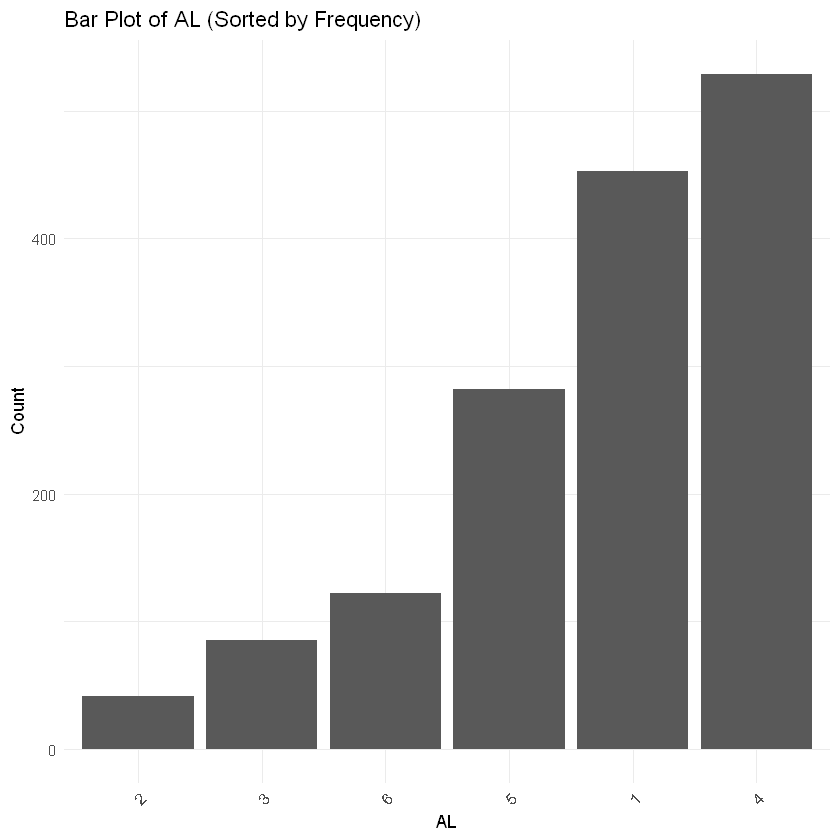

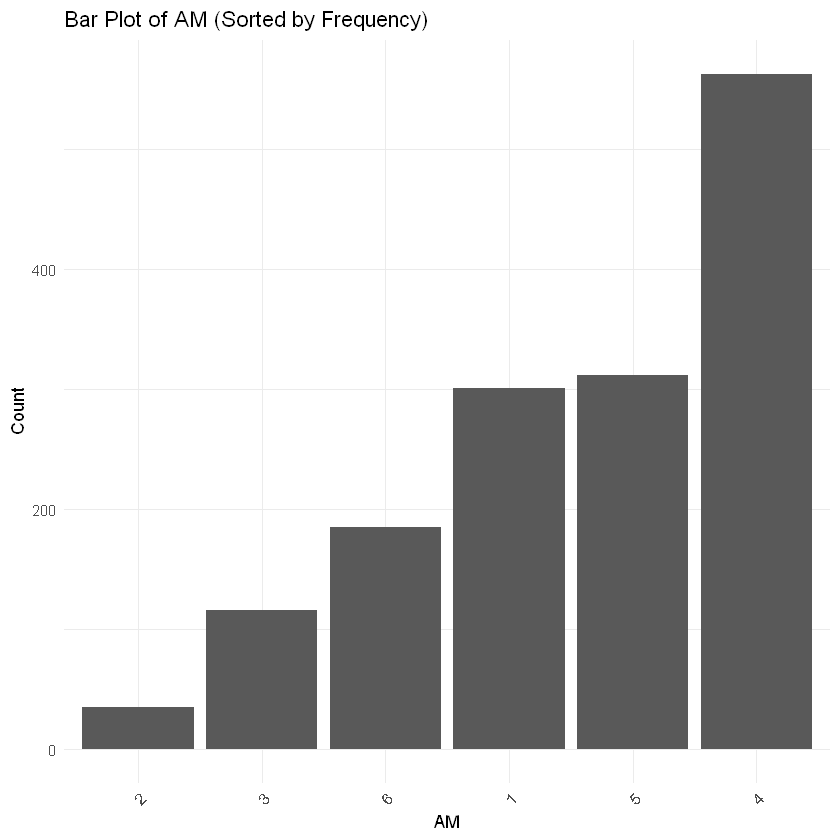

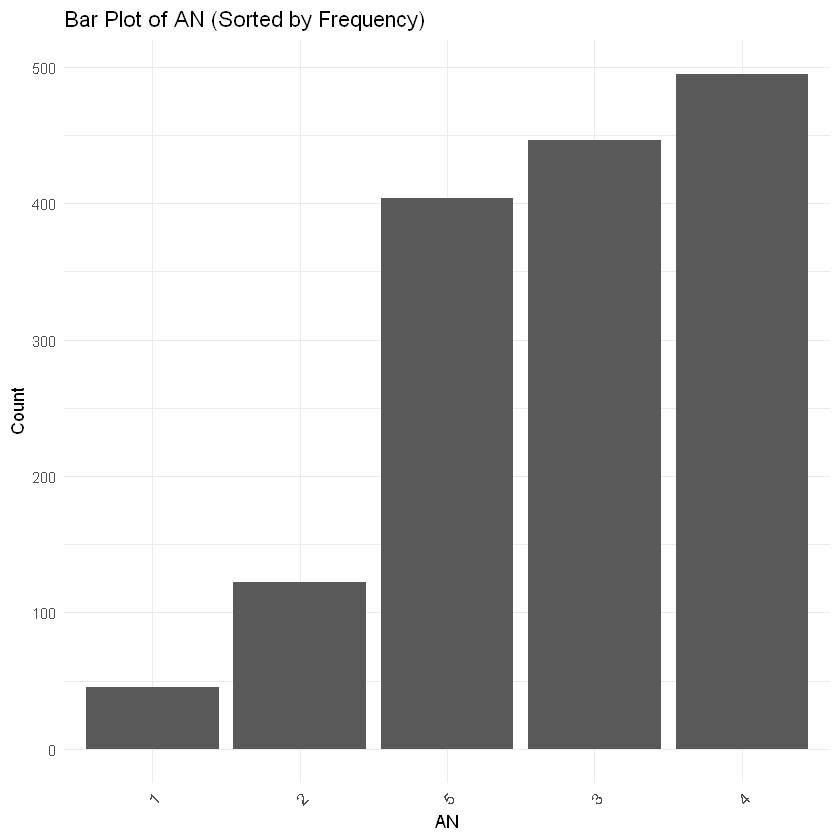

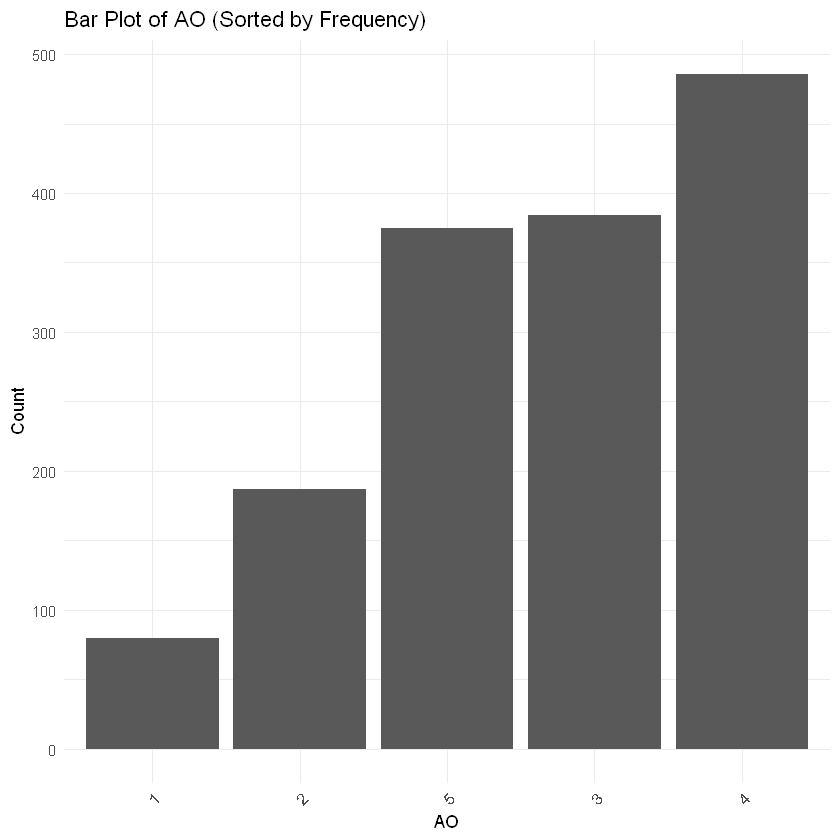

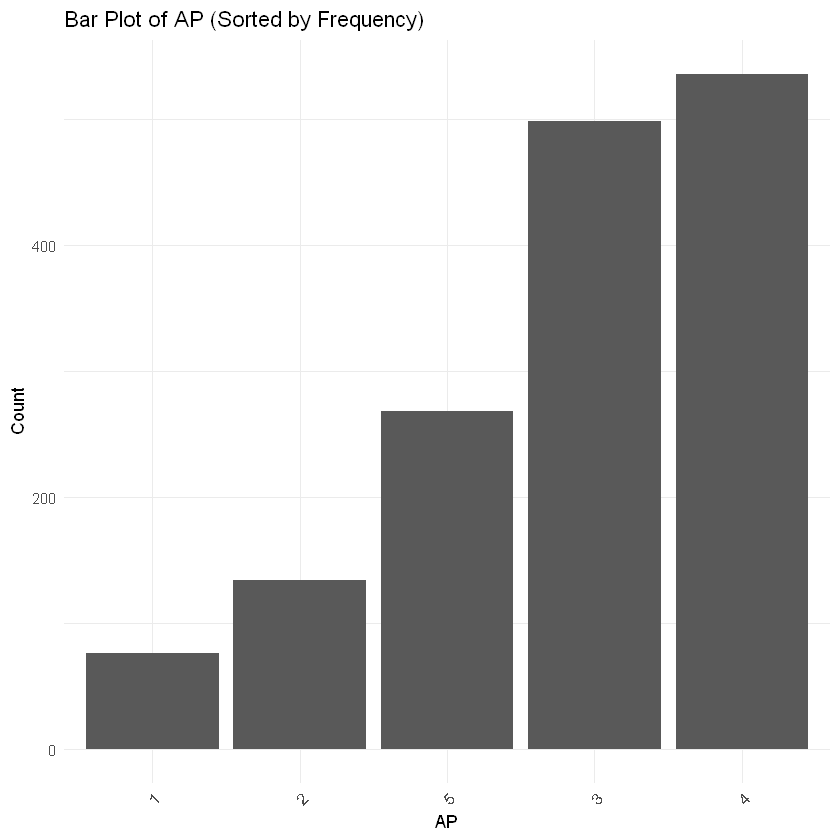

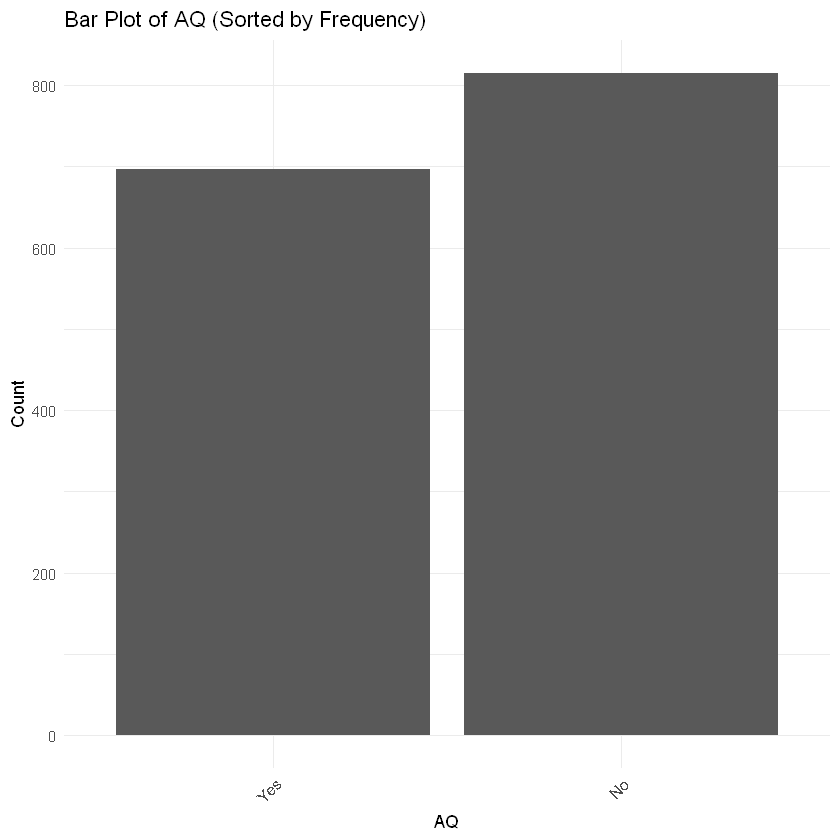

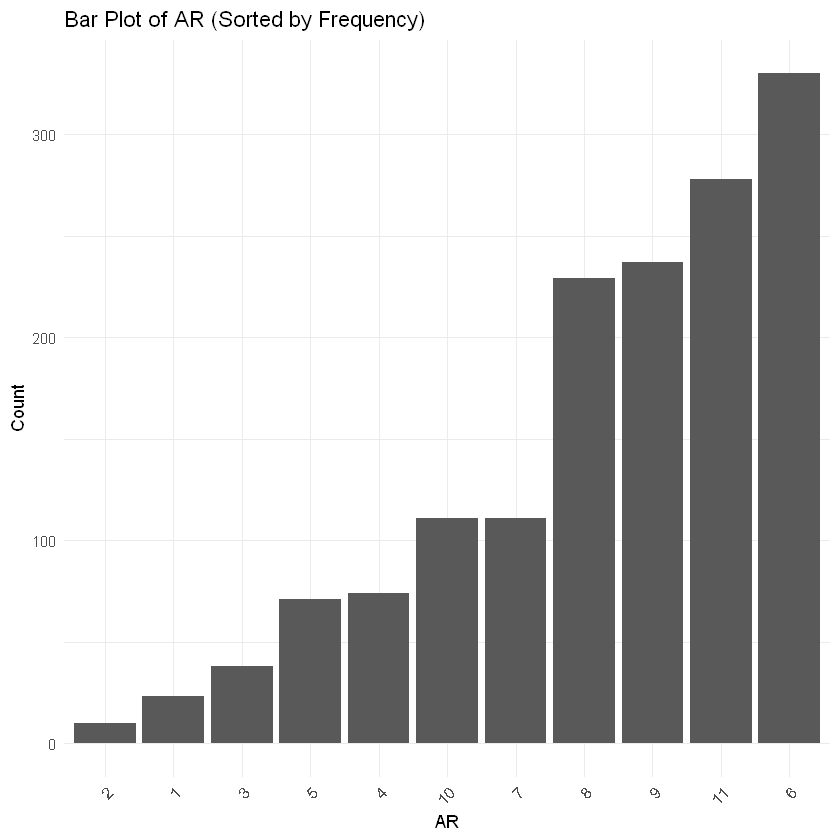

In [7]:
for (col in categorical_columns) {
  plot <- ggplot(data, aes(x = fct_rev(fct_infreq(get(col))))) +
    geom_bar() +
    ggtitle(paste("Bar Plot of", col, "(Sorted by Frequency)")) +
    xlab(col) +
    ylab("Count") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
  print(plot)
}

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."


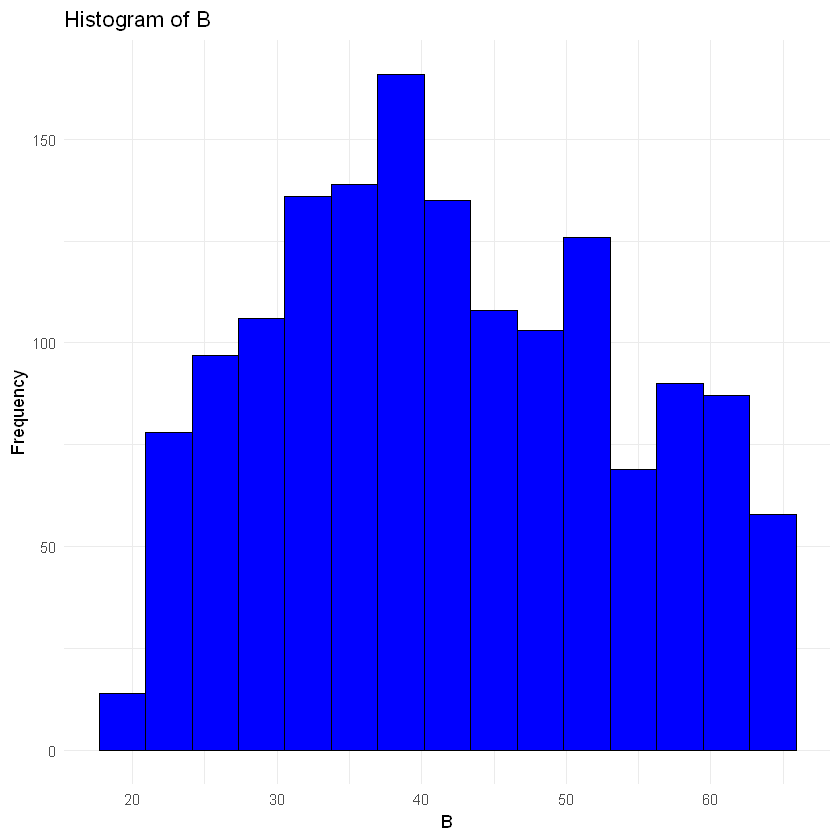

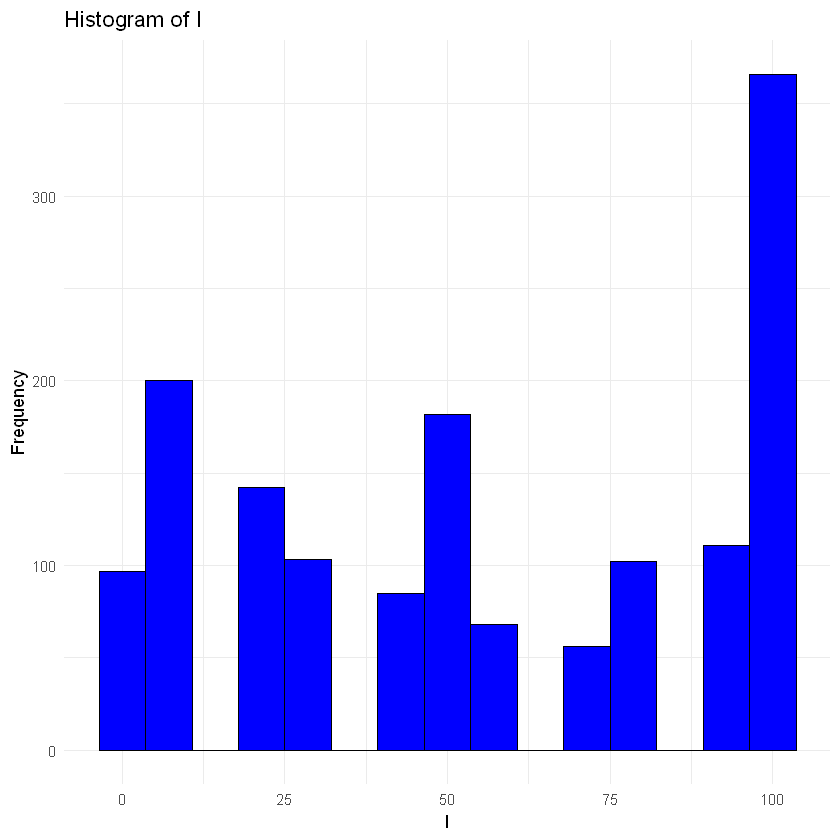

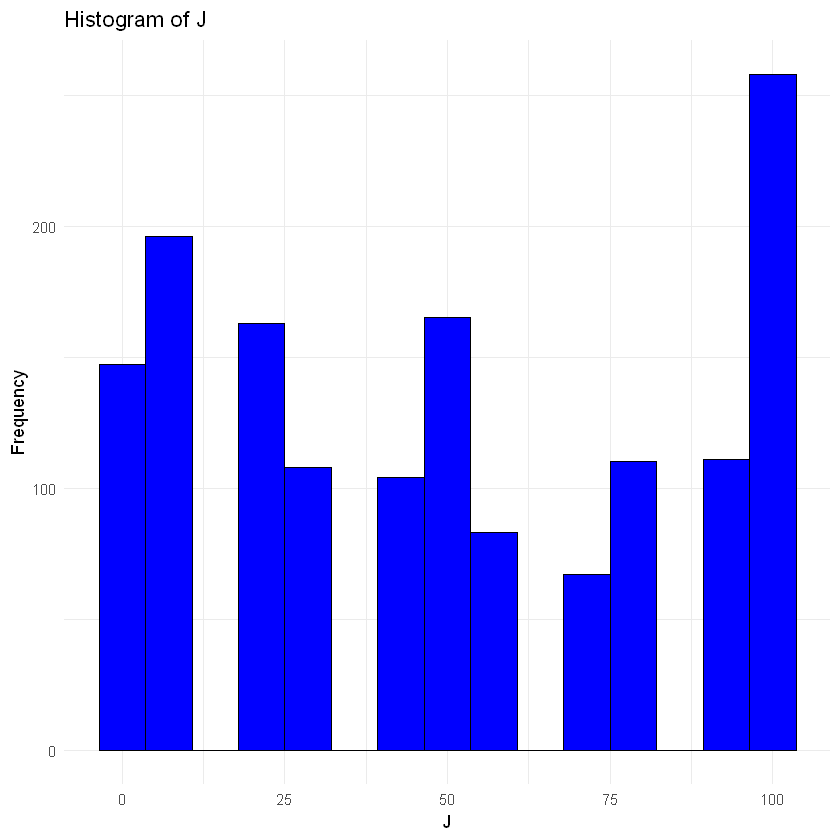

Warning message:
"Removed 750 rows containing non-finite outside the scale range (`stat_bin()`)."


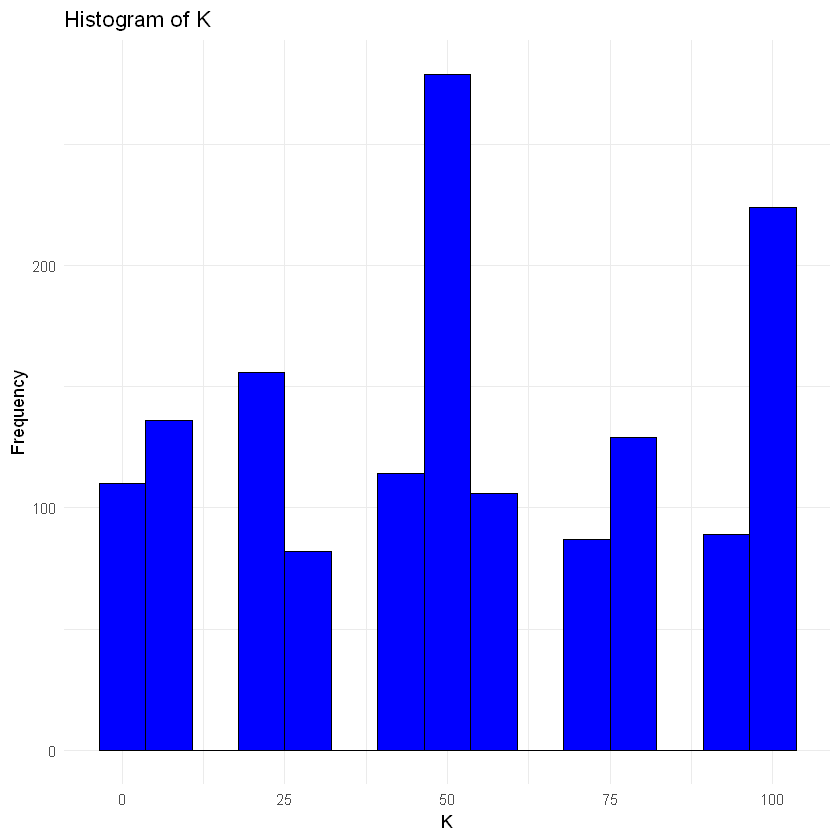

Warning message:
"Removed 3 rows containing non-finite outside the scale range (`stat_bin()`)."


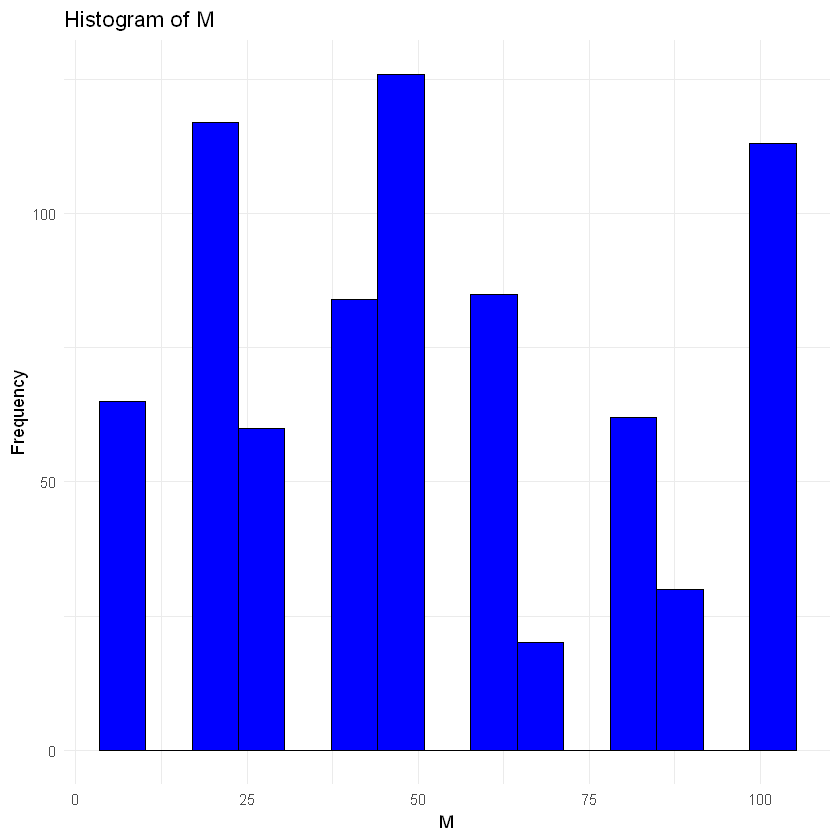

Warning message:
"Removed 3 rows containing non-finite outside the scale range (`stat_bin()`)."


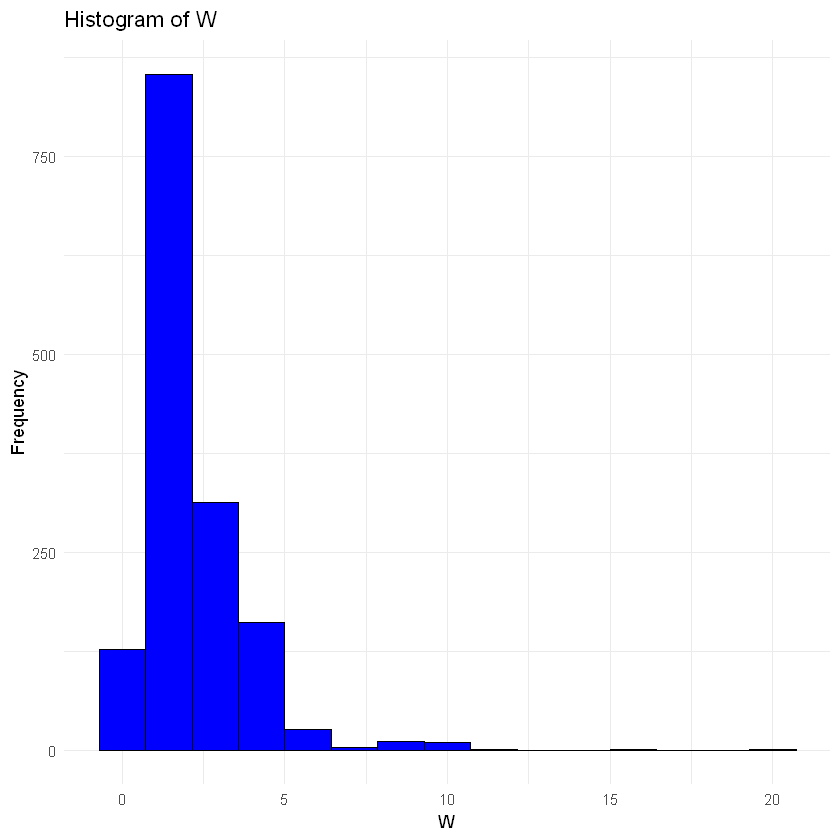

Warning message:
"Removed 17 rows containing non-finite outside the scale range (`stat_bin()`)."


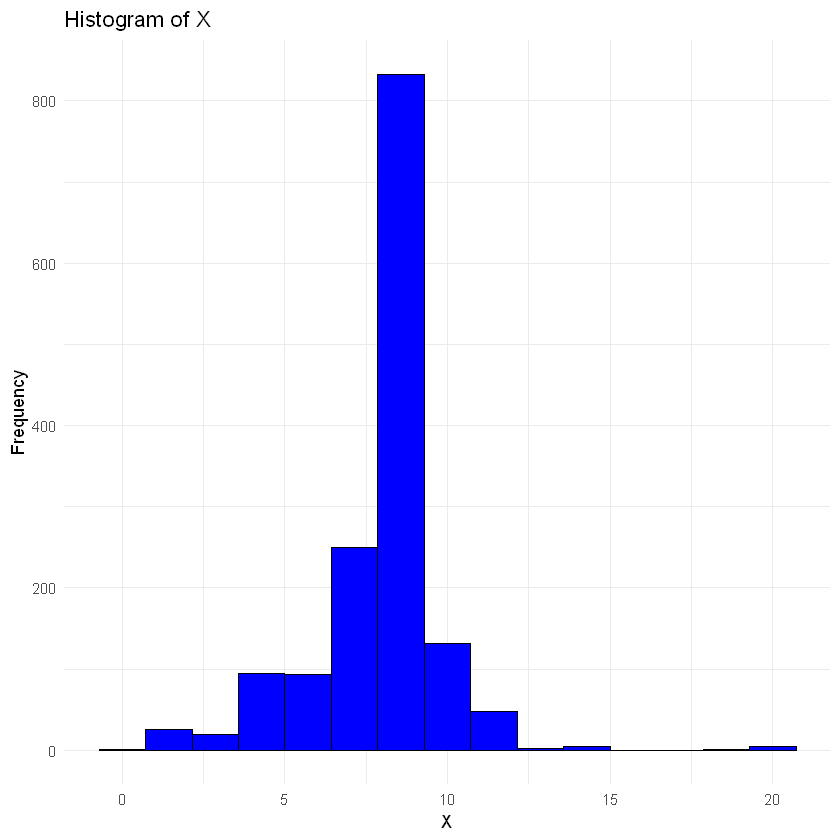

Warning message:
"Removed 5 rows containing non-finite outside the scale range (`stat_bin()`)."


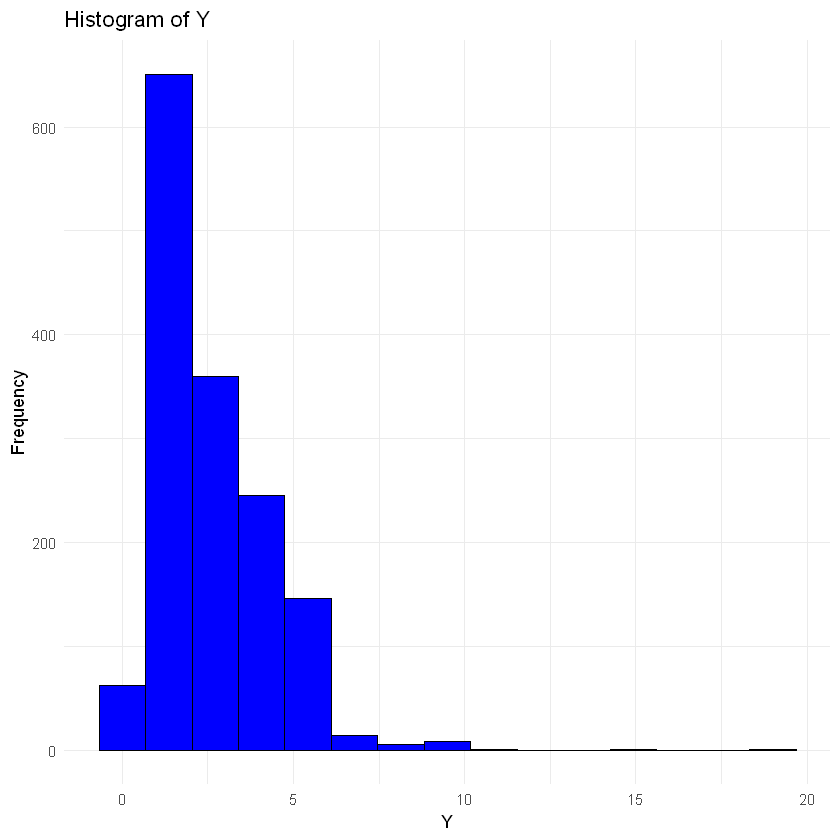

Warning message:
"Removed 12 rows containing non-finite outside the scale range (`stat_bin()`)."


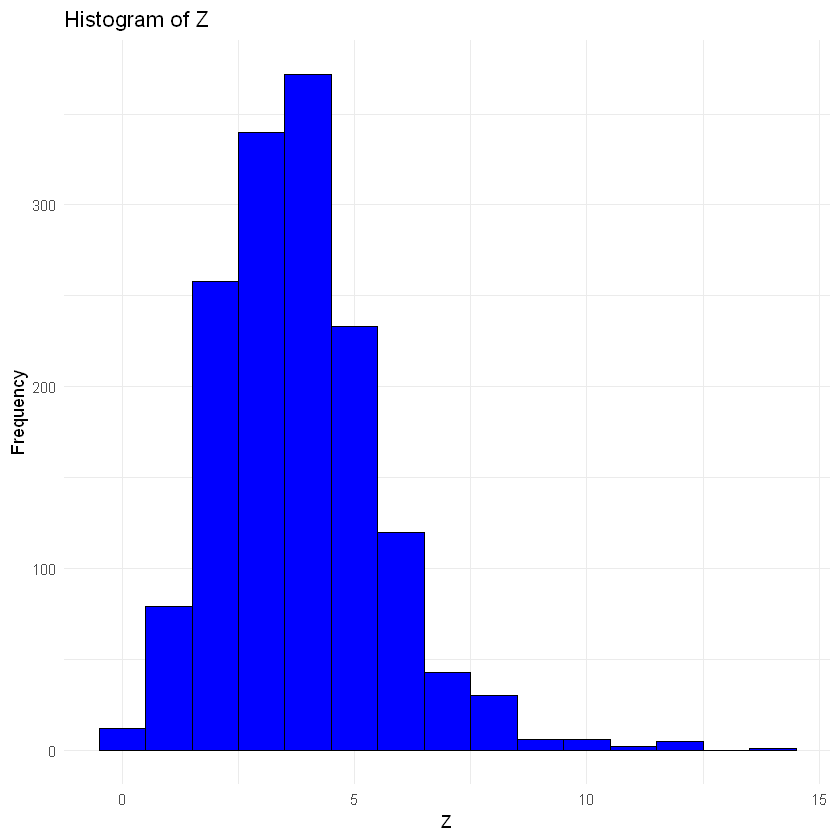

Warning message:
"Removed 24 rows containing non-finite outside the scale range (`stat_bin()`)."


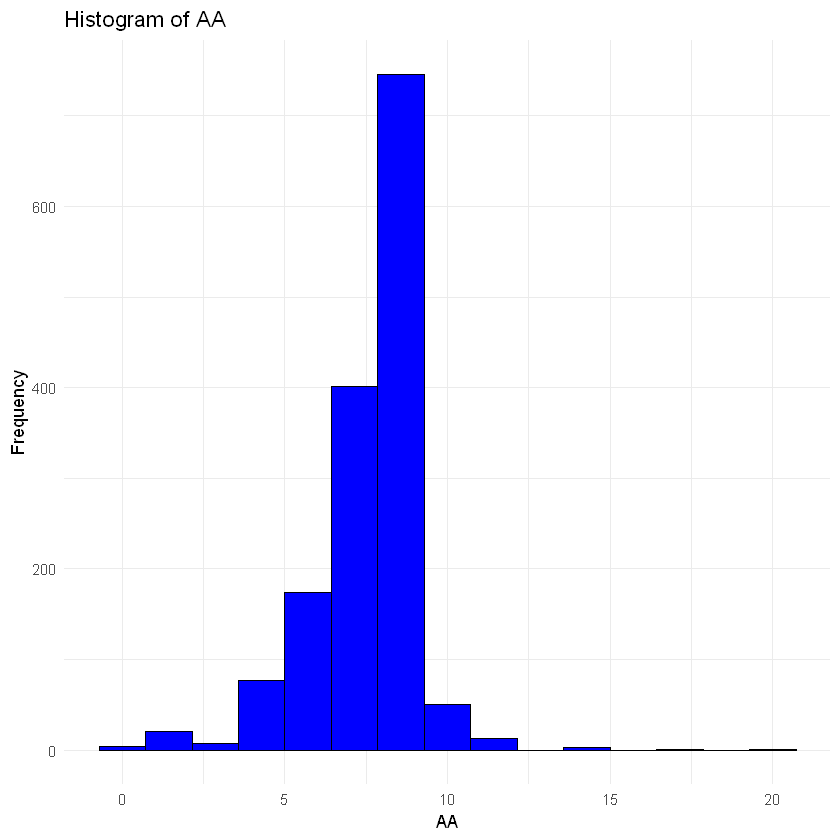

Warning message:
"Removed 3 rows containing non-finite outside the scale range (`stat_bin()`)."


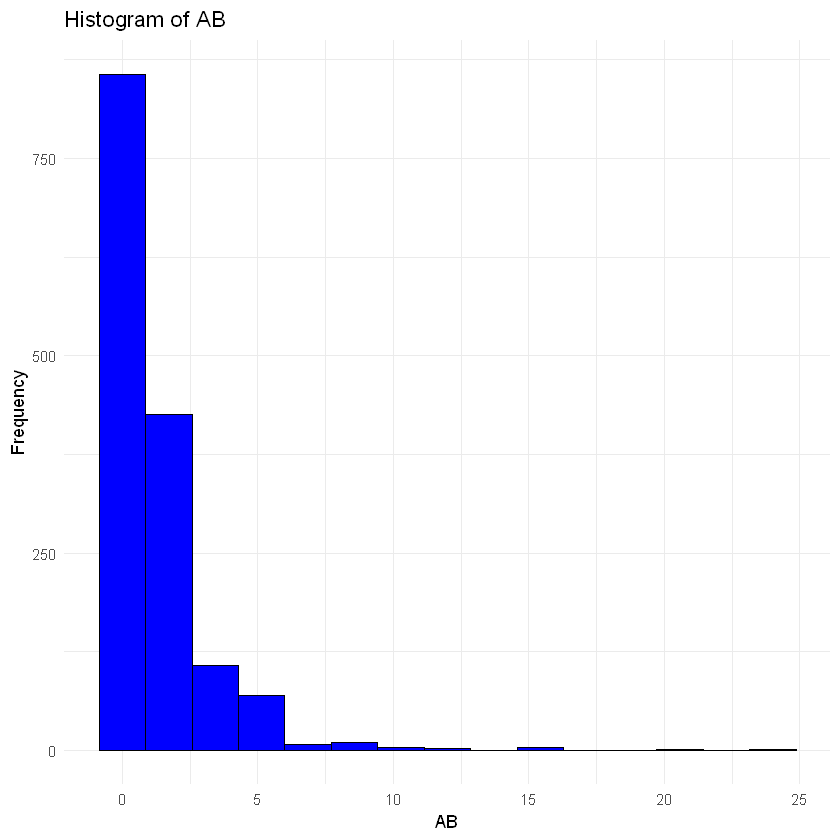

Warning message:
"Removed 18 rows containing non-finite outside the scale range (`stat_bin()`)."


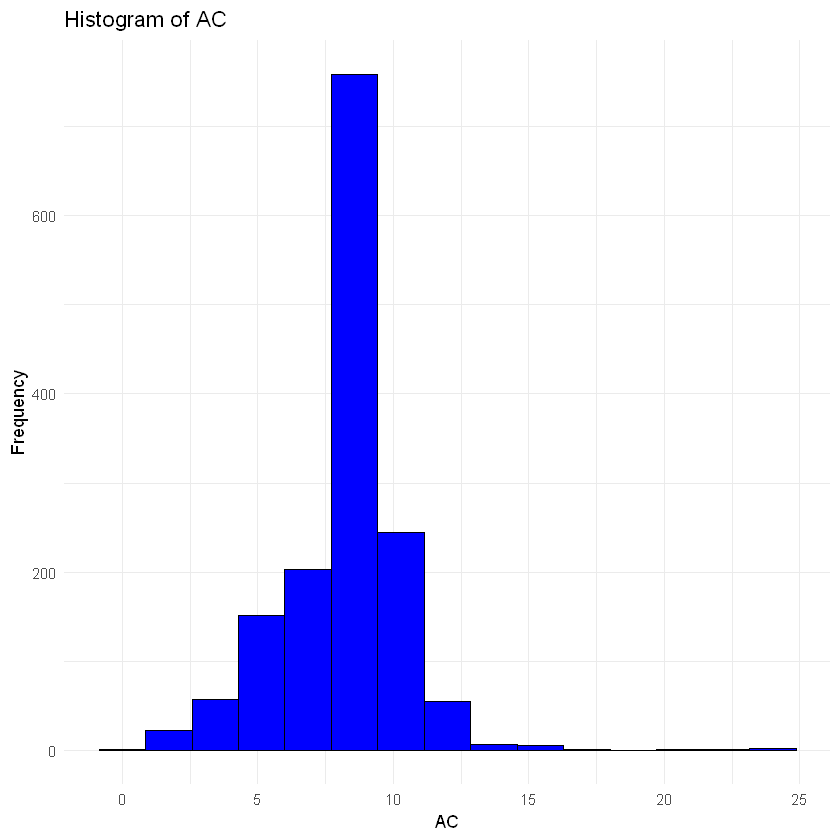

Warning message:
"Removed 7 rows containing non-finite outside the scale range (`stat_bin()`)."


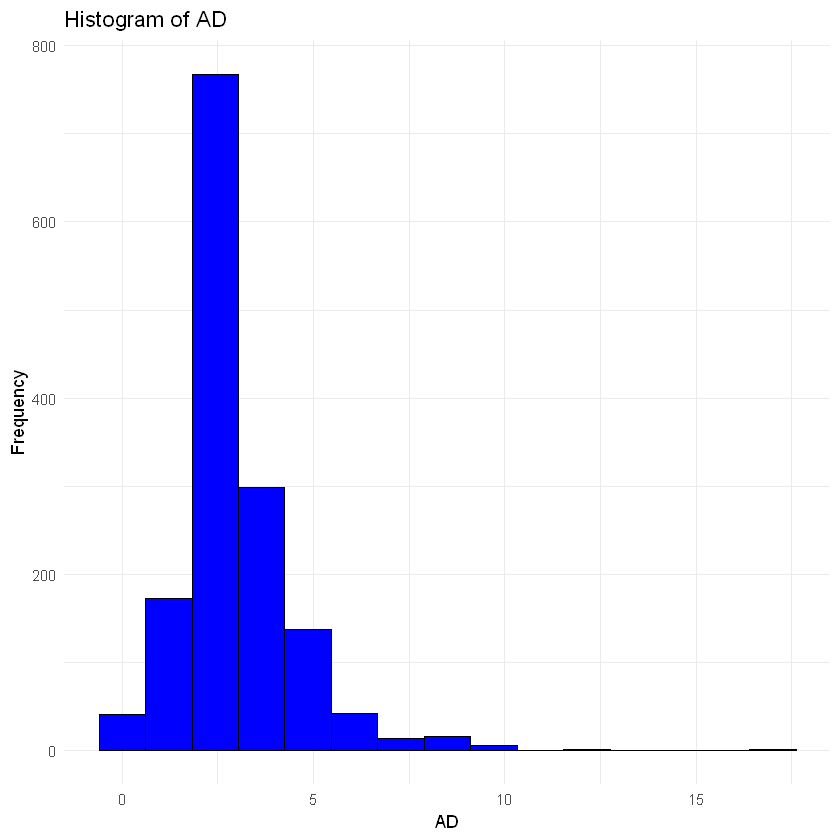

Warning message:
"Removed 9 rows containing non-finite outside the scale range (`stat_bin()`)."


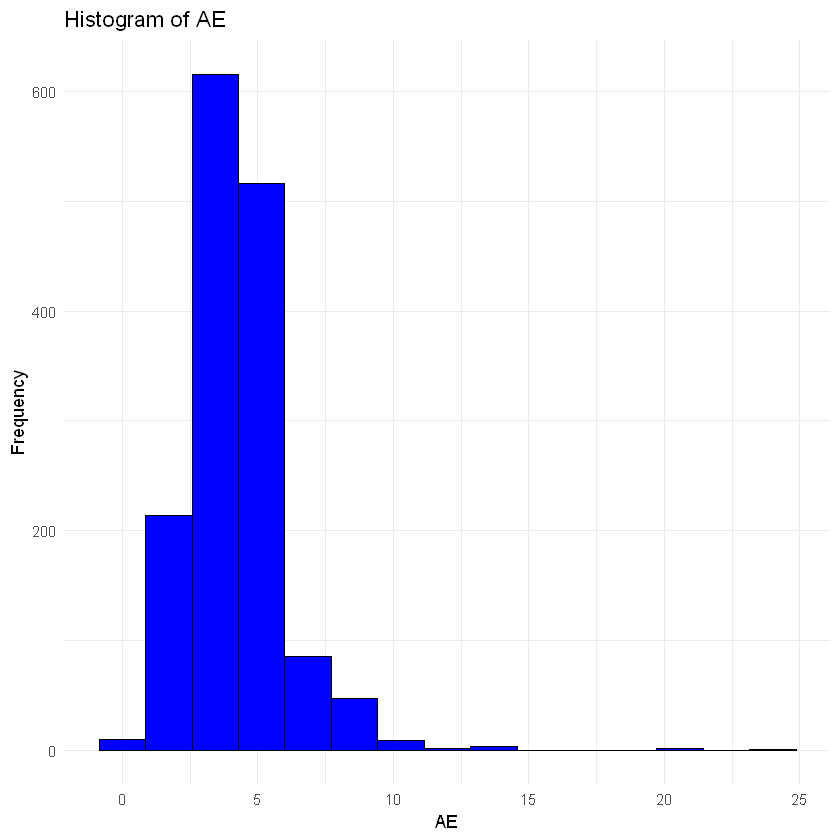

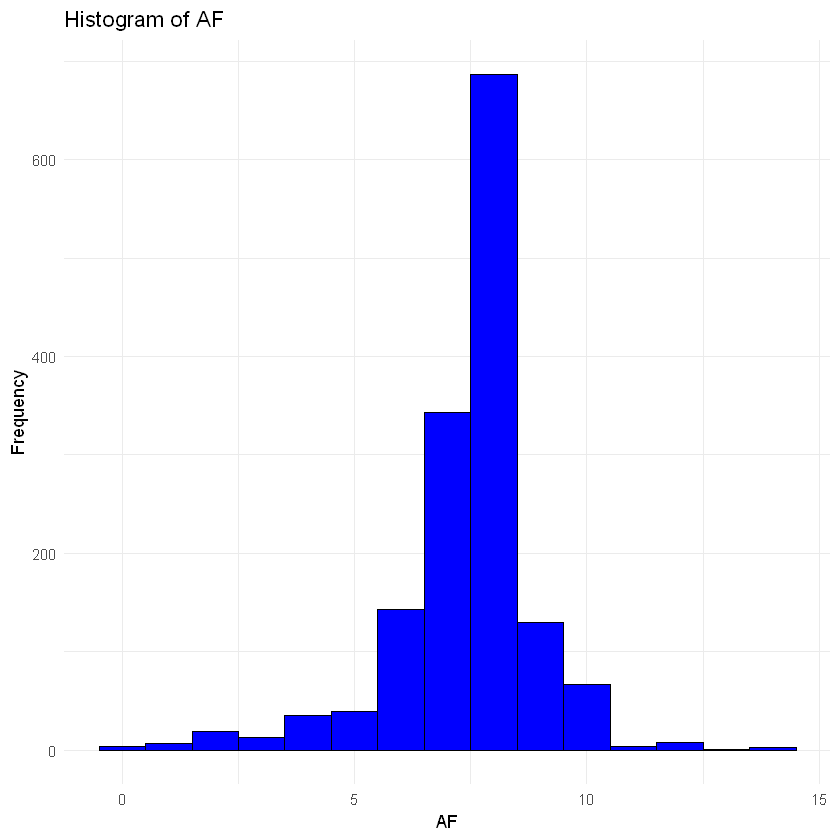

In [8]:
for (col in numeric_columns) {
  plot <- ggplot(data, aes_string(x = col)) +
    geom_histogram(bins = 15, fill = "blue", color = "black") +
    ggtitle(paste("Histogram of", col)) +
    xlab(col) +
    ylab("Frequency") +
    theme_minimal()
  print(plot)
}

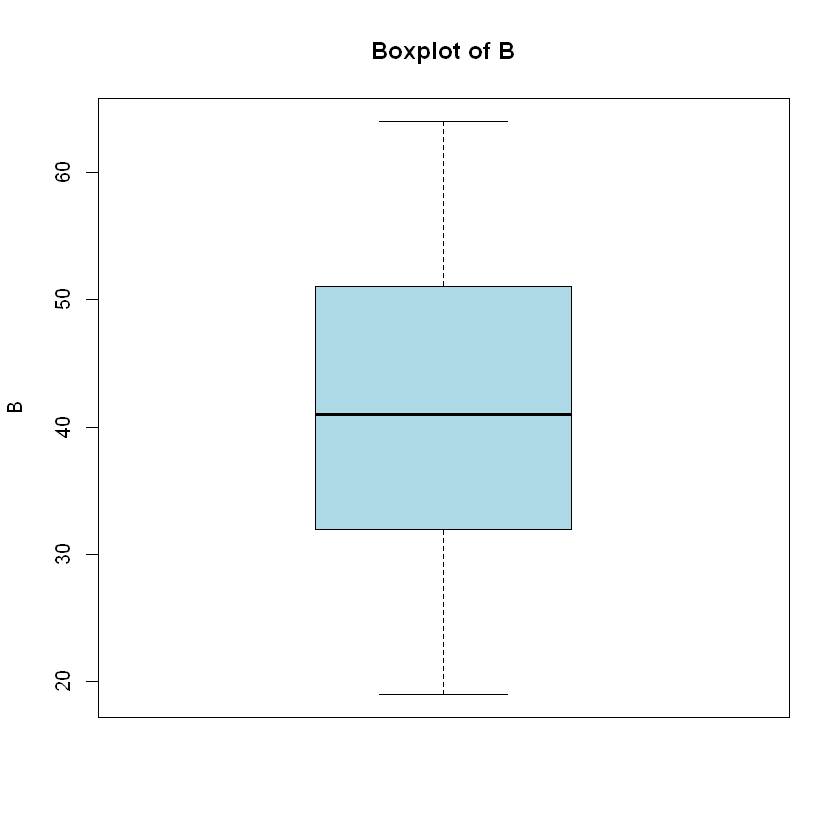

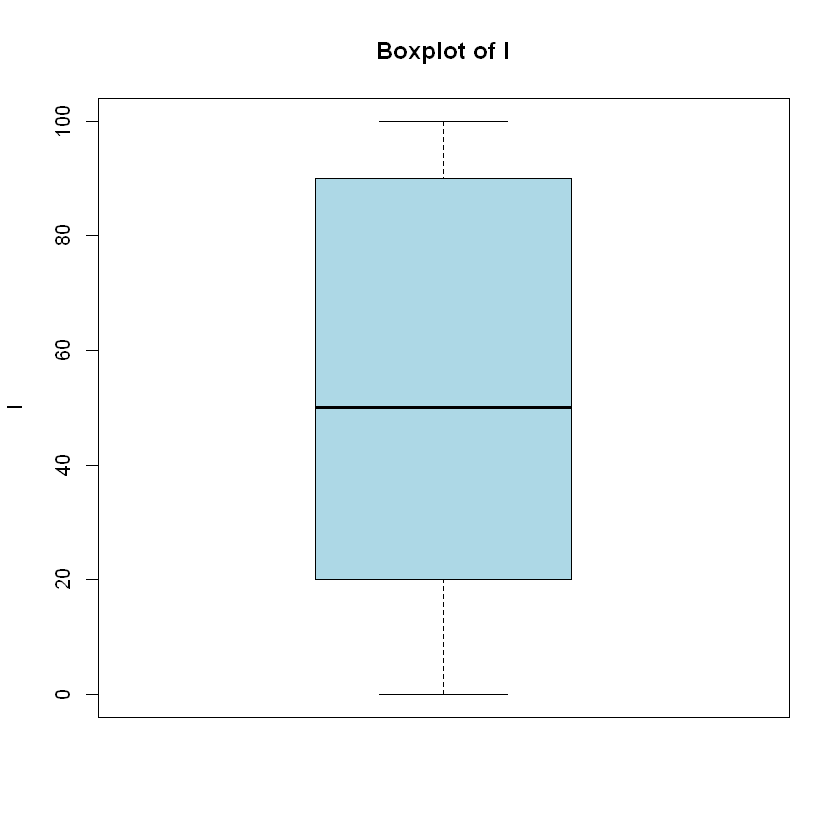

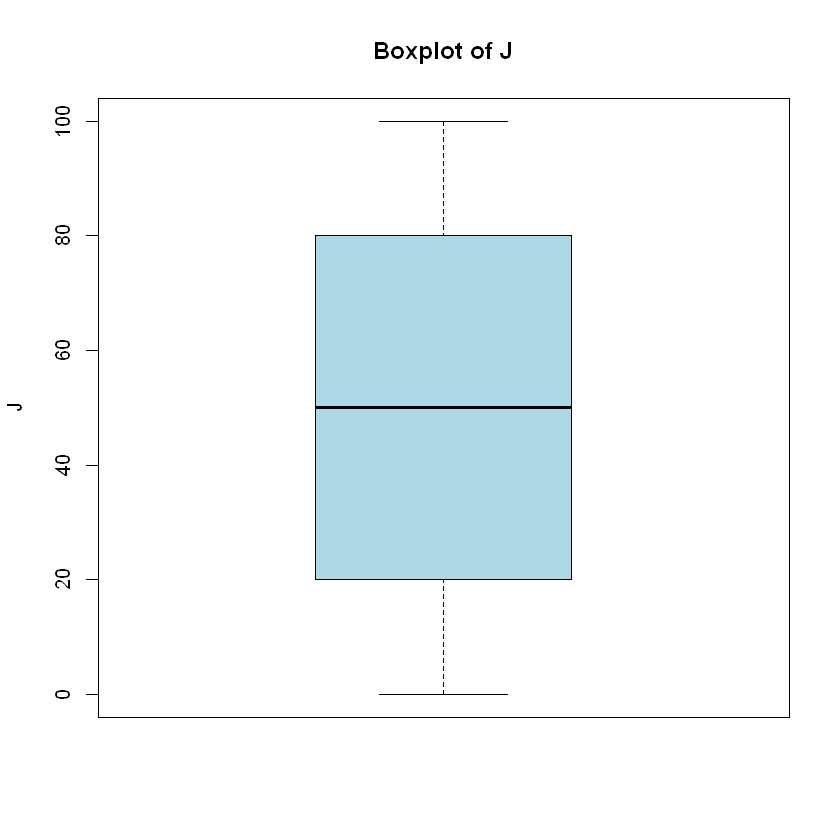

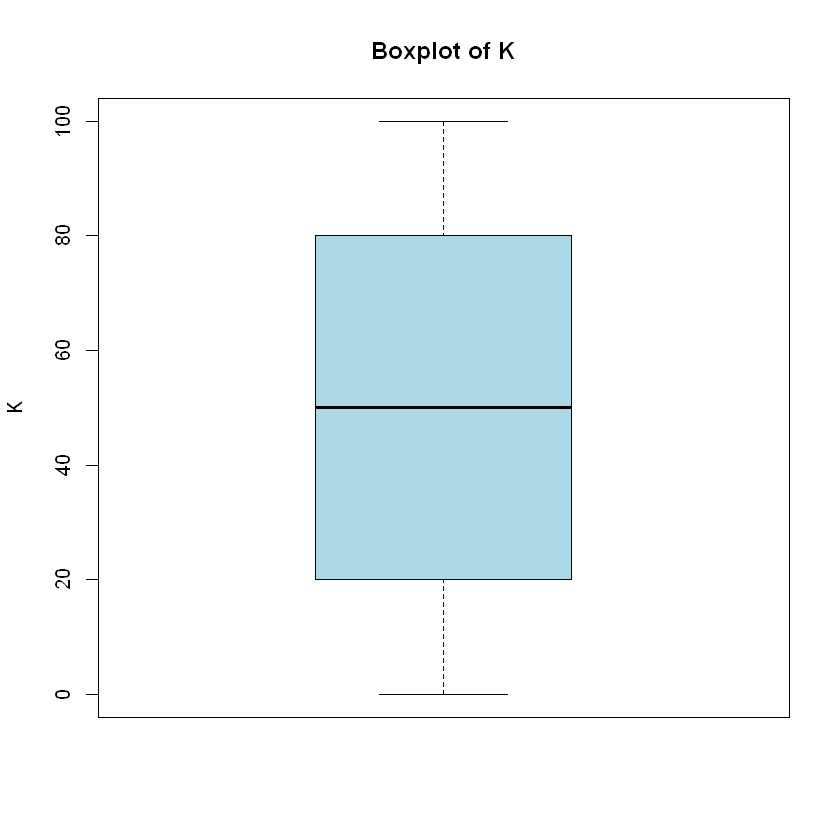

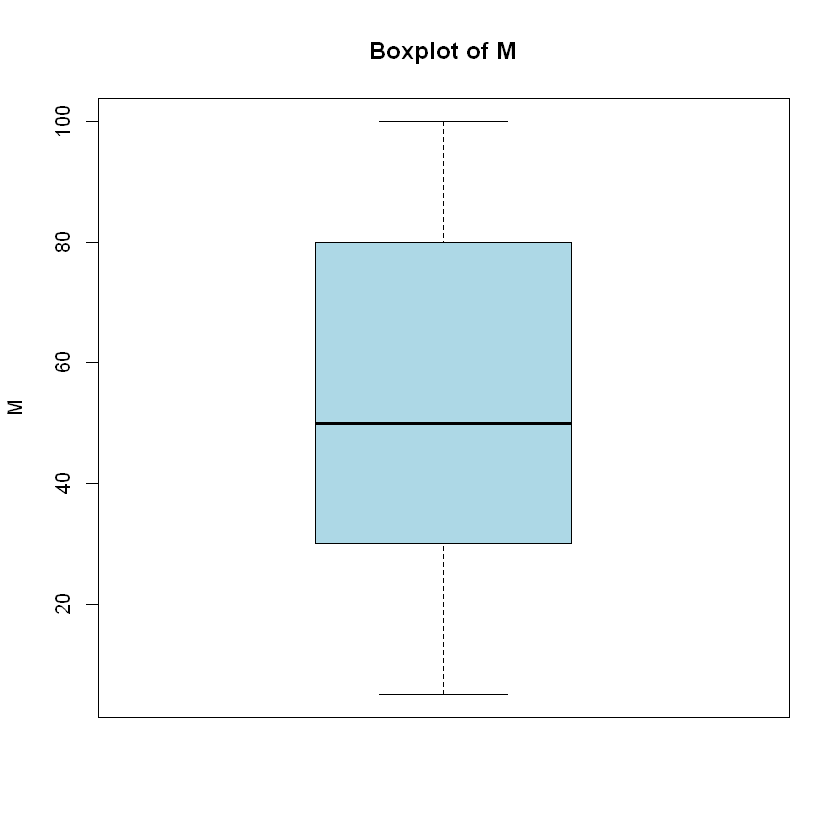

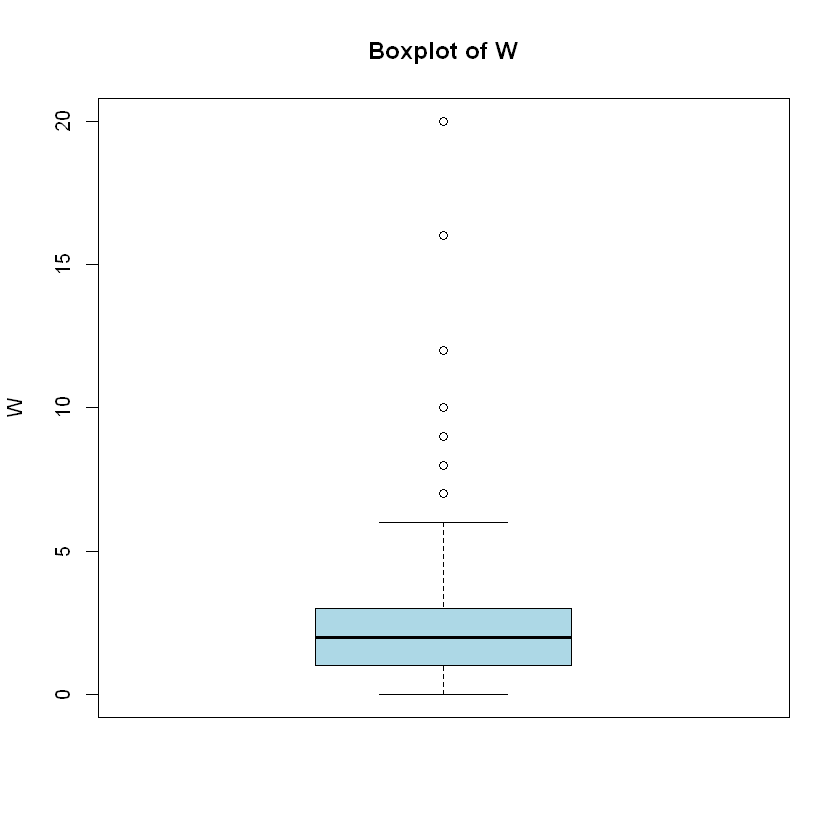

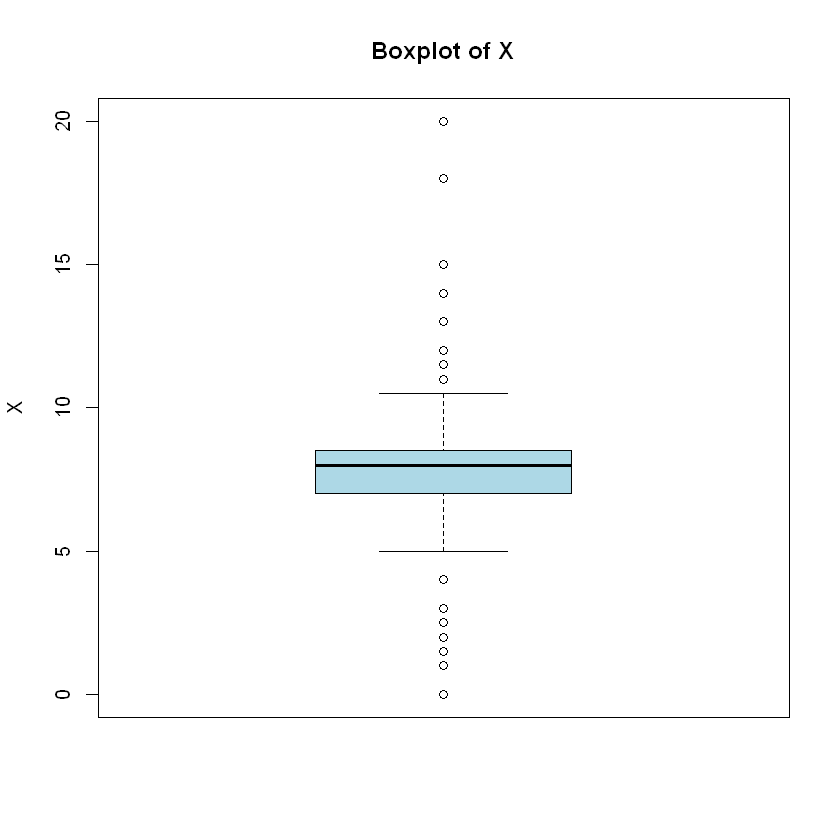

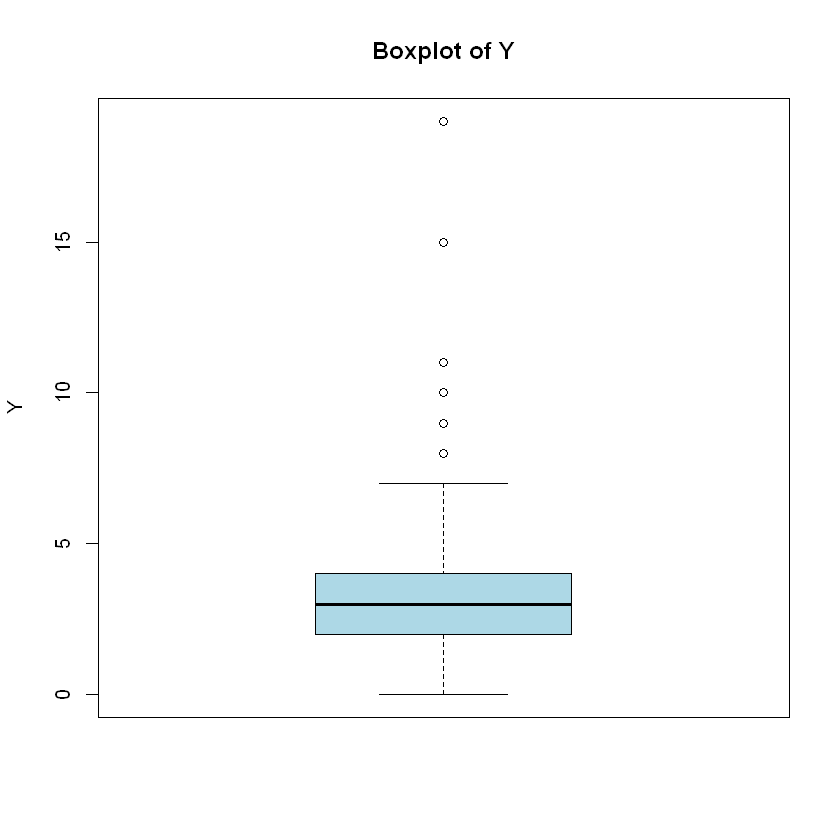

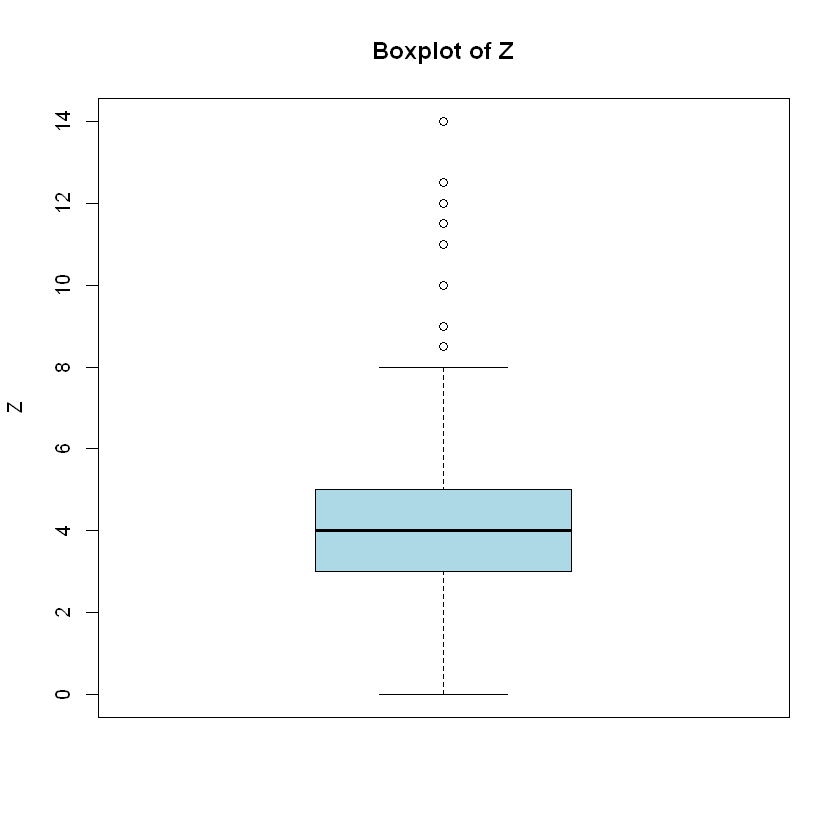

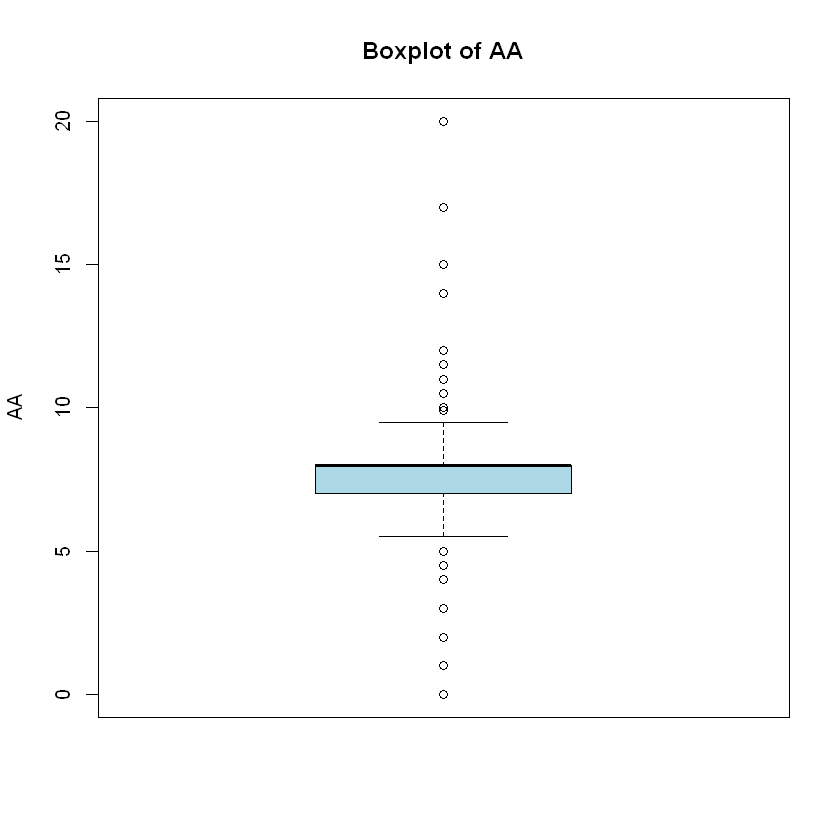

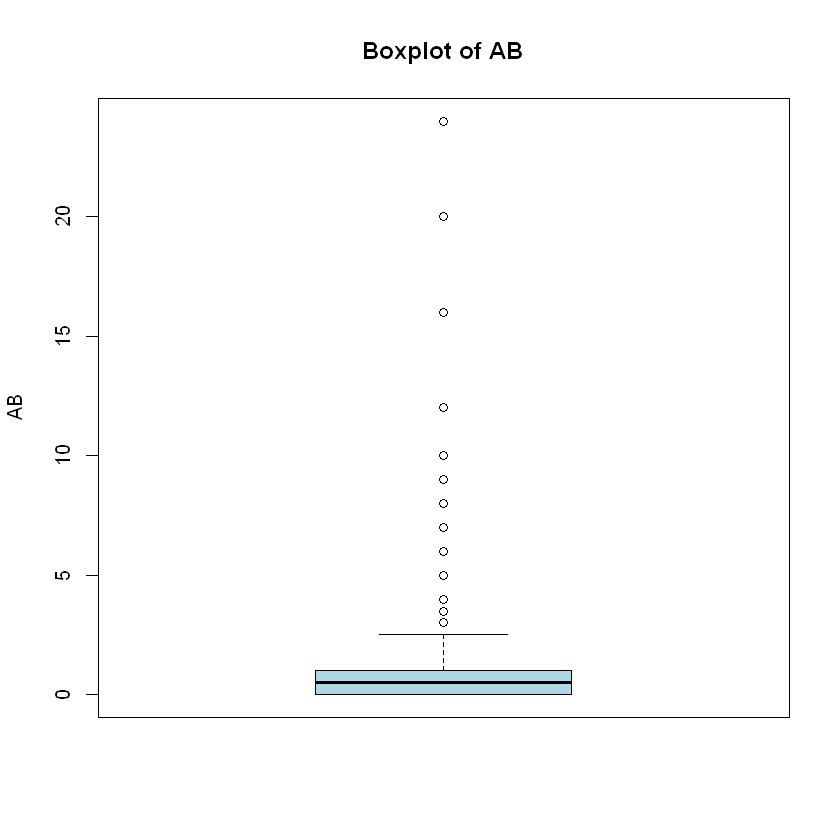

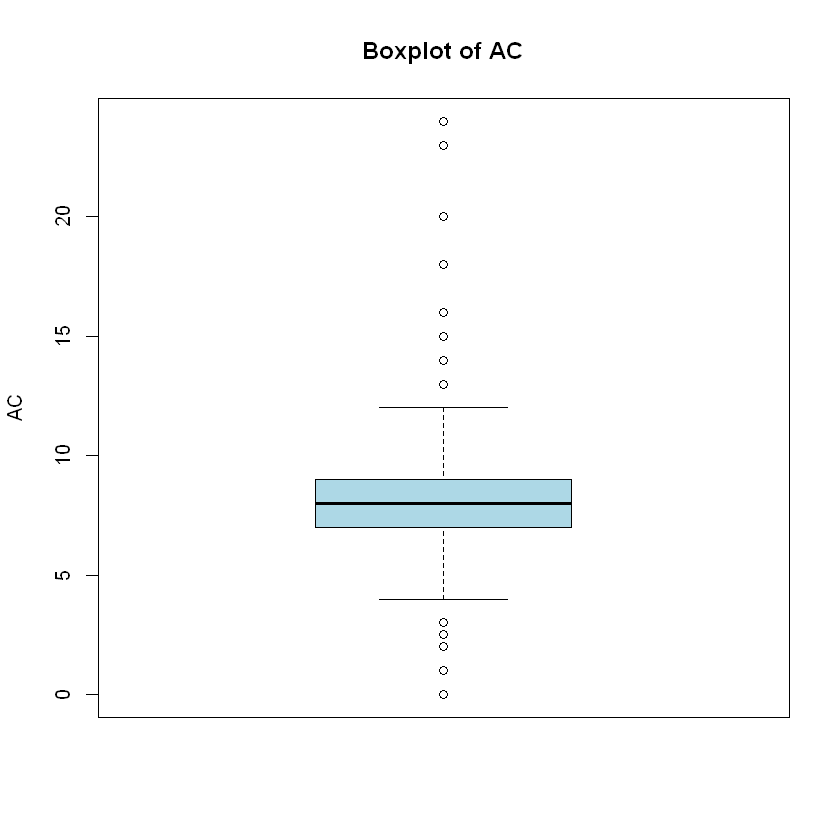

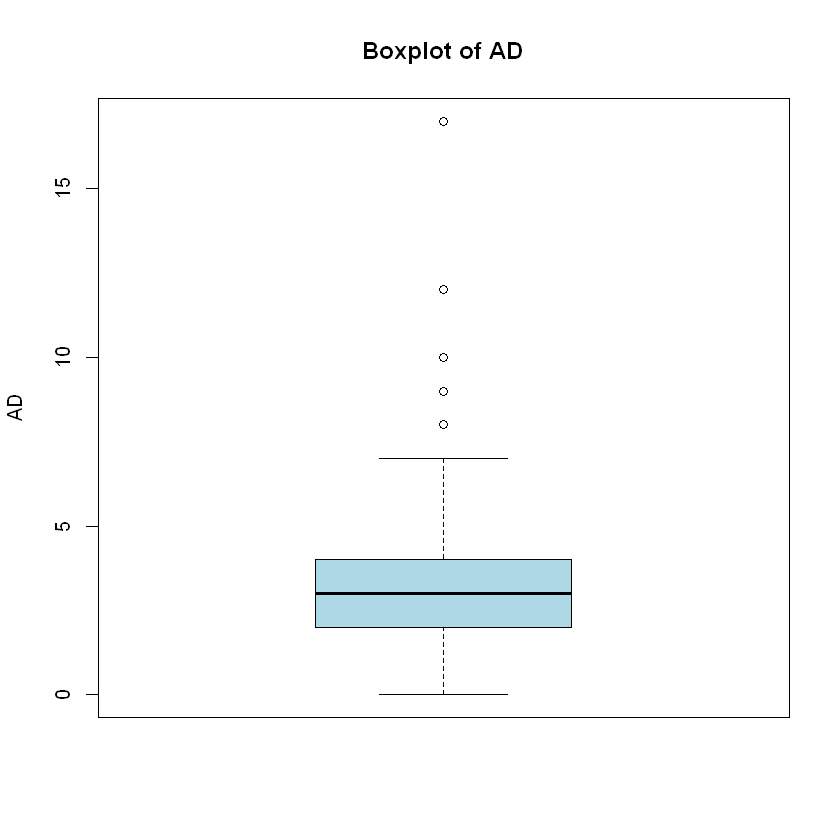

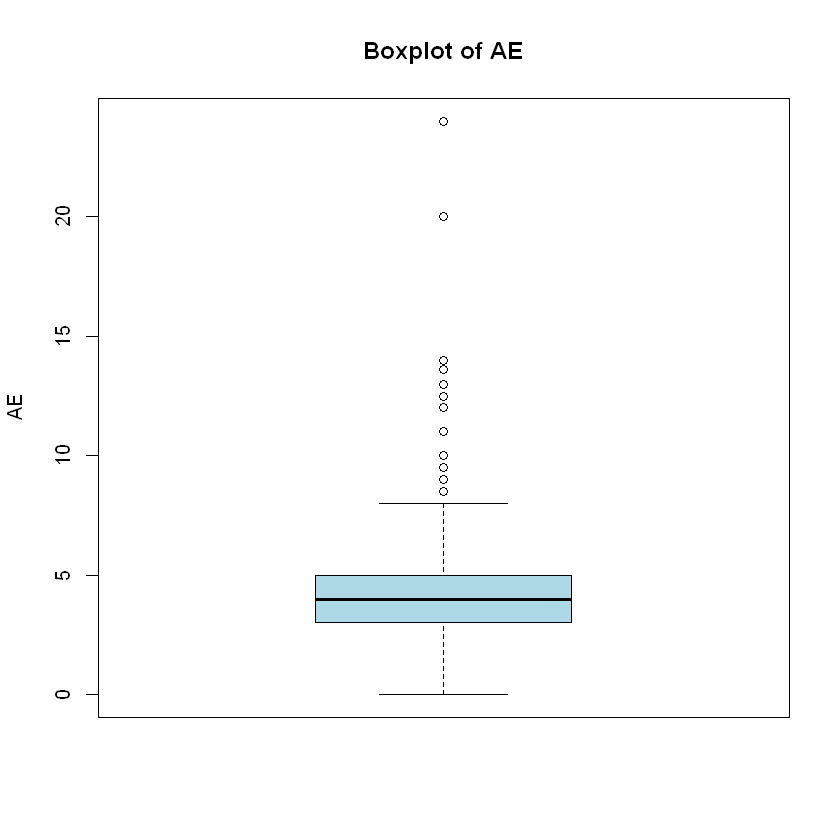

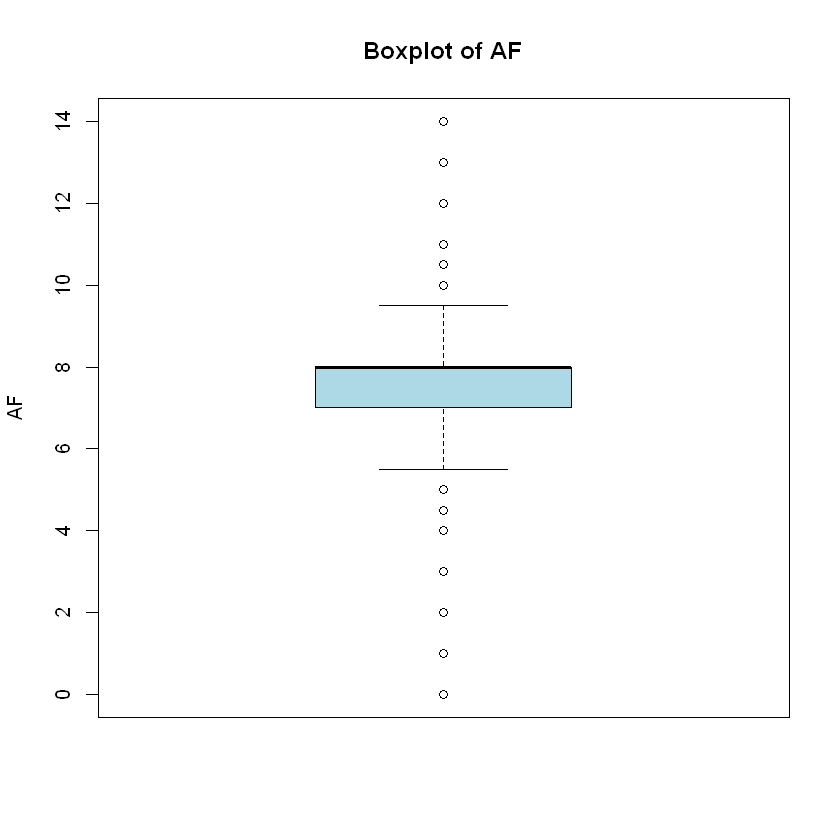

In [9]:
for (col in numeric_columns) {
  boxplot(data[[col]],
          main = paste("Boxplot of", col),
          ylab = col,
          col = "lightblue",
          border = "black")
}

In [10]:
create_report(data)



processing file: report.rmd



1/42                                 
2/42 [global_options]                
3/42                                 
4/42 [introduce]                     
5/42                                 
6/42 [plot_intro]                    
7/42                                 
8/42 [data_structure]                
9/42                                 
10/42 [missing_profile]               
11/42                                 
12/42 [univariate_distribution_header]
13/42                                 
14/42 [plot_histogram]                
15/42                                 
16/42 [plot_density]                  
17/42                                 
18/42 [plot_frequency_bar]            
19/42                                 
20/42 [plot_response_bar]             
21/42                                 
22/42 [plot_with_bar]                 
23/42                                 
24/42 [plot_normal_qq]                
25/42                                 
26/42 [plot_response_qq]          

output file: C:/Users/robert/work/dm-project/report.knit.md




"C:/Users/robert/AppData/Local/Pandoc/pandoc" +RTS -K512m -RTS "C:\Users\robert\work\dm-project\report.knit.md" --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output pandoc54b86d4970b3.html --lua-filter "C:\Users\robert\AppData\Local\R\win-library\4.3\rmarkdown\rmarkdown\lua\pagebreak.lua" --lua-filter "C:\Users\robert\AppData\Local\R\win-library\4.3\rmarkdown\rmarkdown\lua\latex-div.lua" --lua-filter "C:\Users\robert\AppData\Local\R\win-library\4.3\rmarkdown\rmarkdown\lua\table-classes.lua" --embed-resources --standalone --variable bs3=TRUE --section-divs --table-of-contents --toc-depth 6 --template "C:\Users\robert\AppData\Local\R\win-library\4.3\rmarkdown\rmd\h\default.html" --no-highlight --variable highlightjs=1 --variable theme=yeti --mathjax --variable "mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML" --include-in-header "C:\Users\robert\AppData\Local\Temp\RtmpSKTk3E\rmarkdown-str54b837184c64.html" 



Output created: C:/Users/robert/work/dm-project/report.html

